# ASPECT EXTRACTION WITH FLAIR

In this laboratory you will learn to extract aspects from restaurant reviews using the ABSA 2016 corpus for several languages: https://alt.qcri.org/semeval2016/task5/

You can check the corpora already formatted and ready to use in the datasets folder: 

````
/content/drive/My Drive/Colab Notebooks/2022-ILTAPP/datasets/absa2016/
````

+ Sequence Labelling: You may use the files called ````$lang-(train|test -full-aspects.tsv```` files to train an aspect detector with Flair as a sequence labelling task.
+ Text Classification: Check the files called ````$lang-(train|test)-acb.tsv```` to train an aspect detection with Flair as a multilabel classification task.

## ASSIGNMENT 1

+ TODO: For the language of your choice, please inspect the relevant files to understand what the task is about and what you want to learn.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/LAP/Subjects/AP1/labs

/content/drive/MyDrive/LAP/Subjects/AP1/labs


In [2]:
!pip install flair

## ASSIGNMENT 2

+ TODO Train a Aspect Category Detector system using Flair SequenceTagger
+ TODO Print learning curves to see if you need to perform more epochs
+ HINT: You can reuse the training lab for NER in order to do these tasks.

In [1]:
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings
from typing import List

In [4]:
# define columns
columns = {0:'text', 1:'aspect'}

# get the corpus
corpus = ColumnCorpus(data_folder='../datasets/absa2016', 
                      train_file='en-train-full-aspects.tsv', 
                      dev_file=None, 
                      test_file='en-test-full-aspects.tsv',
                      column_format=columns)

print(corpus.obtain_statistics())

2022-03-01 21:50:06,647 Reading data from ../datasets/absa2016
2022-03-01 21:50:06,652 Train: ../datasets/absa2016/en-train-full-aspects.tsv
2022-03-01 21:50:06,654 Dev: None
2022-03-01 21:50:06,656 Test: ../datasets/absa2016/en-test-full-aspects.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1800,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 26093,
            "min": 1,
            "max": 68,
            "avg": 14.49611111111111
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 676,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 9952,
            "min": 1,
            "max": 78,
            "avg": 14.721893491124261
        }
    },
    "DEV": {
        "dataset": "DEV",
        "total_number_of_documents": 200,
        "numb

In [5]:
# 2. what tag do we want to predict?
tag_type = 'aspect'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(len(tag_dictionary))

2022-03-01 21:50:10,203 Computing label dictionary. Progress:


100%|██████████| 1800/1800 [00:00<00:00, 19005.17it/s]

2022-03-01 21:50:10,310 Corpus contains the labels: aspect (#26093)
2022-03-01 21:50:10,314 Created (for label 'aspect') Dictionary with 26 tags: <unk>, O, B-RESTAURANT#GENERAL, B-SERVICE#GENERAL, B-FOOD#QUALITY, B-FOOD#STYLE_OPTIONS, I-FOOD#QUALITY, B-DRINKS#PRICES, I-DRINKS#PRICES, I-SERVICE#GENERAL, I-RESTAURANT#GENERAL, B-AMBIENCE#GENERAL, I-FOOD#STYLE_OPTIONS, B-DRINKS#STYLE_OPTIONS, I-DRINKS#STYLE_OPTIONS, B-FOOD#PRICES, I-FOOD#PRICES, B-RESTAURANT#MISCELLANEOUS, B-LOCATION#GENERAL, B-DRINKS#QUALITY, I-AMBIENCE#GENERAL, I-RESTAURANT#MISCELLANEOUS, I-LOCATION#GENERAL, I-DRINKS#QUALITY, B-RESTAURANT#PRICES, I-RESTAURANT#PRICES
26


In [9]:
# initialize embeddings
word_embedding = WordEmbeddings('glove')
flair_embedding_forward = FlairEmbeddings('en-forward')
flair_embedding_backward = FlairEmbeddings('en-backward')
embeddings = StackedEmbeddings([word_embedding, flair_embedding_forward, flair_embedding_backward])

2022-03-01 18:17:47,182 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpfgktp5p_


100%|██████████| 160000128/160000128 [00:04<00:00, 35136241.49B/s]

2022-03-01 18:17:51,832 copying /tmp/tmpfgktp5p_ to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2022-03-01 18:17:52,135 removing temp file /tmp/tmpfgktp5p_
2022-03-01 18:17:52,299 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpzjhq2z8x


100%|██████████| 21494764/21494764 [00:00<00:00, 29759540.16B/s]

2022-03-01 18:17:53,119 copying /tmp/tmpzjhq2z8x to cache at /root/.flair/embeddings/glove.gensim
2022-03-01 18:17:53,158 removing temp file /tmp/tmpzjhq2z8x


2022-03-01 18:17:54,993 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpnhmb_y5m


100%|██████████| 73034624/73034624 [00:02<00:00, 33389454.74B/s]

2022-03-01 18:17:57,286 copying /tmp/tmpnhmb_y5m to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2022-03-01 18:17:57,395 removing temp file /tmp/tmpnhmb_y5m
2022-03-01 18:18:10,256 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmp3p7269tj


100%|██████████| 73034575/73034575 [00:02<00:00, 35404564.04B/s]

2022-03-01 18:18:12,417 copying /tmp/tmp3p7269tj to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2022-03-01 18:18:12,563 removing temp file /tmp/tmp3p7269tj


In [10]:
# initialize sequence tagger
from flair.models import SequenceTagger
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

In [11]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [12]:
trainer.train('../resources/flair-aspects-en',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=50)

2022-03-01 18:19:40,584 ----------------------------------------------------------------------------------------------------
2022-03-01 18:19:40,592 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, b

{'dev_loss_history': [tensor(0.4043, device='cuda:0'),
  tensor(0.2189, device='cuda:0'),
  tensor(0.2055, device='cuda:0'),
  tensor(0.1928, device='cuda:0'),
  tensor(0.1730, device='cuda:0'),
  tensor(0.1589, device='cuda:0'),
  tensor(0.1605, device='cuda:0'),
  tensor(0.1481, device='cuda:0'),
  tensor(0.1443, device='cuda:0'),
  tensor(0.1431, device='cuda:0'),
  tensor(0.1515, device='cuda:0'),
  tensor(0.1337, device='cuda:0'),
  tensor(0.1316, device='cuda:0'),
  tensor(0.1313, device='cuda:0'),
  tensor(0.1289, device='cuda:0'),
  tensor(0.1264, device='cuda:0'),
  tensor(0.1307, device='cuda:0'),
  tensor(0.1299, device='cuda:0'),
  tensor(0.1257, device='cuda:0'),
  tensor(0.1273, device='cuda:0'),
  tensor(0.1192, device='cuda:0'),
  tensor(0.1232, device='cuda:0'),
  tensor(0.1214, device='cuda:0'),
  tensor(0.1210, device='cuda:0'),
  tensor(0.1219, device='cuda:0'),
  tensor(0.1164, device='cuda:0'),
  tensor(0.1289, device='cuda:0'),
  tensor(0.1185, device='cuda:0'),


2022-03-01 18:30:59,888 ----------------------------------------------------------------------------------------------------
2022-03-01 18:30:59,891 WARNING: No LOSS found for test split in this data.
2022-03-01 18:30:59,892 Are you sure you want to plot LOSS and not another value?
2022-03-01 18:30:59,894 ----------------------------------------------------------------------------------------------------
2022-03-01 18:30:59,929 ----------------------------------------------------------------------------------------------------
2022-03-01 18:30:59,930 WARNING: No F1 found for test split in this data.
2022-03-01 18:30:59,932 Are you sure you want to plot F1 and not another value?
2022-03-01 18:30:59,936 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in ../resources/flair-en-aspects/training.png


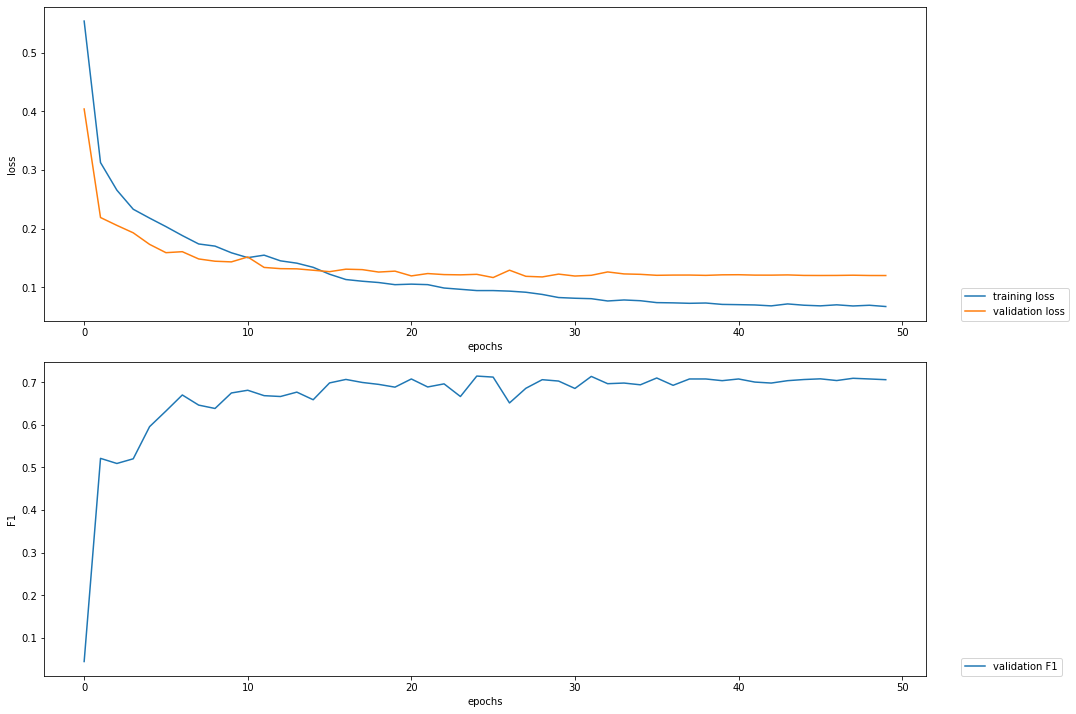

In [13]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('../resources/flair-aspects-en/loss.tsv')

## ASSIGNMENT 3

+ TODO Train a TextClassifier with Flair for aspect detection reusing code from previous labs
++ HINT: Install latest version of flair.
++ HINT: add a label_type='aspect' to ClassifierCorpus and Trainer.


In [14]:
from flair.datasets import ClassificationCorpus
# get the corpus
corpus: Corpus = ClassificationCorpus("../datasets/absa2016",
                      train_file='en-train-acb.tsv', 
                      dev_file=None, 
                      test_file='en-test-acb.tsv', 
                      label_type='aspect'
                      )

print(corpus.obtain_statistics())

2022-03-01 20:54:39,394 Reading data from ../datasets/absa2016
2022-03-01 20:54:39,395 Train: ../datasets/absa2016/en-train-acb.tsv
2022-03-01 20:54:39,398 Dev: None
2022-03-01 20:54:39,400 Test: ../datasets/absa2016/en-test-acb.tsv
2022-03-01 20:54:39,843 Initialized corpus ../datasets/absa2016 (label type name is 'aspect')
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1537,
        "number_of_documents_per_class": {
            "RESTAURANT#GENERAL": 385,
            "SERVICE#GENERAL": 385,
            "FOOD#QUALITY": 767,
            "FOOD#STYLE_OPTIONS": 125,
            "DRINKS#STYLE_OPTIONS": 31,
            "DRINKS#PRICES": 18,
            "RESTAURANT#PRICES": 71,
            "RESTAURANT#MISCELLANEOUS": 87,
            "AMBIENCE#GENERAL": 231,
            "FOOD#PRICES": 78,
            "LOCATION#GENERAL": 26,
            "DRINKS#QUALITY": 40
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 22

In [15]:
from flair.embeddings import DocumentRNNEmbeddings
from flair.models import TextClassifier   
# 4. make a list of word embeddings
word_embeddings = [
                   WordEmbeddings('en-crawl'),
                   #FlairEmbeddings('news-forward'),
                   #FlairEmbeddings('news-backward'),
]

# 5. initialize document embedding by passing list of word embeddings                                                                                                                   
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)                                                                                                  
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                   hidden_size=512,
                                                                   reproject_words=True,
                                                                   reproject_words_dimension=256,
                                                                   rnn_type='LSTM',
)

2022-03-01 20:54:45,942 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmphhpx7zzu


100%|██████████| 1200000128/1200000128 [00:52<00:00, 22910554.23B/s]

2022-03-01 20:55:38,673 copying /tmp/tmphhpx7zzu to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2022-03-01 20:55:42,778 removing temp file /tmp/tmphhpx7zzu
2022-03-01 20:55:43,527 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmpbbxigiqk


100%|██████████| 39323680/39323680 [00:02<00:00, 15636718.75B/s]

2022-03-01 20:55:46,395 copying /tmp/tmpbbxigiqk to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M


2022-03-01 20:55:46,437 removing temp file /tmp/tmpbbxigiqk


In [17]:
# 6. create the label dictionary
label_dict = corpus.make_label_dictionary(label_type="aspect")

2022-03-01 20:56:37,208 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1537/1537 [00:01<00:00, 1125.81it/s]

2022-03-01 20:56:39,043 Corpus contains the labels: aspect (#1537)
2022-03-01 20:56:39,044 Created (for label 'aspect') Dictionary with 13 tags: <unk>, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, FOOD#STYLE_OPTIONS, DRINKS#STYLE_OPTIONS, DRINKS#PRICES, RESTAURANT#PRICES, RESTAURANT#MISCELLANEOUS, AMBIENCE#GENERAL, FOOD#PRICES, LOCATION#GENERAL, DRINKS#QUALITY


In [18]:
# 7. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, label_type="aspect")

In [19]:
# 8. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

In [20]:
# 9. start the training
trainer.train('../resources/flair-acb-en',
              train_with_dev=False,
              max_epochs=50)

2022-03-01 20:57:01,707 ----------------------------------------------------------------------------------------------------
2022-03-01 20:57:01,708 Model: "TextClassifier(
  (loss_function): CrossEntropyLoss()
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings(
        'en-crawl'
        (embedding): Embedding(1000001, 300)
      )
    )
    (word_reprojection_map): Linear(in_features=300, out_features=256, bias=True)
    (rnn): LSTM(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=13, bias=True)
  (weights): None
  (weight_tensor) None
)"
2022-03-01 20:57:01,712 ----------------------------------------------------------------------------------------------------
2022-03-01 20:57:01,718 Corpus: "Corpus: 1537 train + 171 dev + 587 test sentences"
2022-03-01 20:57:01,719 -------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:57:02,613 epoch 1 - iter 4/49 - loss 0.07731907 - samples/sec: 278.14 - lr: 0.100000
2022-03-01 20:57:02,796 epoch 1 - iter 8/49 - loss 0.07533158 - samples/sec: 842.08 - lr: 0.100000
2022-03-01 20:57:02,962 epoch 1 - iter 12/49 - loss 0.07290409 - samples/sec: 793.22 - lr: 0.100000
2022-03-01 20:57:03,104 epoch 1 - iter 16/49 - loss 0.07061978 - samples/sec: 931.17 - lr: 0.100000
2022-03-01 20:57:03,304 epoch 1 - iter 20/49 - loss 0.06886005 - samples/sec: 845.07 - lr: 0.100000
2022-03-01 20:57:03,450 epoch 1 - iter 24/49 - loss 0.06706976 - samples/sec: 904.89 - lr: 0.100000
2022-03-01 20:57:03,871 epoch 1 - iter 28/49 - loss 0.06585162 - samples/sec: 974.92 - lr: 0.100000
2022-03-01 20:57:04,010 epoch 1 - iter 32/49 - loss 0.06554189 - samples/sec: 954.84 - lr: 0.100000
2022-03-01 20:57:04,149 epoch 1 - iter 36/49 - loss 0.06463522 - samples/sec: 1050.03 - lr: 0.100000
2022-03-01 20:57:04,287 epoch 1 - iter 40/49 - loss 0.06421680 - samples/sec: 1005.76 - lr: 0.100000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:57:13,821 epoch 2 - iter 4/49 - loss 0.05933869 - samples/sec: 624.09 - lr: 0.100000
2022-03-01 20:57:13,994 epoch 2 - iter 8/49 - loss 0.06092665 - samples/sec: 829.87 - lr: 0.100000
2022-03-01 20:57:14,186 epoch 2 - iter 12/49 - loss 0.06027372 - samples/sec: 792.19 - lr: 0.100000
2022-03-01 20:57:14,360 epoch 2 - iter 16/49 - loss 0.05969496 - samples/sec: 834.89 - lr: 0.100000
2022-03-01 20:57:14,514 epoch 2 - iter 20/49 - loss 0.05885892 - samples/sec: 843.33 - lr: 0.100000
2022-03-01 20:57:14,687 epoch 2 - iter 24/49 - loss 0.05856120 - samples/sec: 920.33 - lr: 0.100000
2022-03-01 20:57:15,267 epoch 2 - iter 28/49 - loss 0.05844995 - samples/sec: 855.84 - lr: 0.100000
2022-03-01 20:57:15,404 epoch 2 - iter 32/49 - loss 0.05810918 - samples/sec: 966.55 - lr: 0.100000
2022-03-01 20:57:15,575 epoch 2 - iter 36/49 - loss 0.05784160 - samples/sec: 818.13 - lr: 0.100000
2022-03-01 20:57:15,715 epoch 2 - iter 40/49 - loss 0.05841896 - samples/sec: 1042.80 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:57:18,090 epoch 3 - iter 4/49 - loss 0.06327852 - samples/sec: 669.83 - lr: 0.100000
2022-03-01 20:57:18,255 epoch 3 - iter 8/49 - loss 0.05969779 - samples/sec: 900.16 - lr: 0.100000
2022-03-01 20:57:18,404 epoch 3 - iter 12/49 - loss 0.05963643 - samples/sec: 930.69 - lr: 0.100000
2022-03-01 20:57:18,603 epoch 3 - iter 16/49 - loss 0.05761668 - samples/sec: 739.32 - lr: 0.100000
2022-03-01 20:57:18,850 epoch 3 - iter 20/49 - loss 0.05705341 - samples/sec: 568.14 - lr: 0.100000
2022-03-01 20:57:19,093 epoch 3 - iter 24/49 - loss 0.05650354 - samples/sec: 554.83 - lr: 0.100000
2022-03-01 20:57:19,330 epoch 3 - iter 28/49 - loss 0.05681177 - samples/sec: 622.07 - lr: 0.100000
2022-03-01 20:57:19,589 epoch 3 - iter 32/49 - loss 0.05674651 - samples/sec: 545.50 - lr: 0.100000
2022-03-01 20:57:20,437 epoch 3 - iter 36/49 - loss 0.05705035 - samples/sec: 716.72 - lr: 0.100000
2022-03-01 20:57:20,613 epoch 3 - iter 40/49 - loss 0.05681023 - samples/sec: 797.59 - lr: 0.100000
20

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:57:23,907 epoch 4 - iter 4/49 - loss 0.05843166 - samples/sec: 417.53 - lr: 0.100000
2022-03-01 20:57:24,135 epoch 4 - iter 8/49 - loss 0.05761304 - samples/sec: 690.08 - lr: 0.100000
2022-03-01 20:57:24,360 epoch 4 - iter 12/49 - loss 0.05801068 - samples/sec: 684.04 - lr: 0.100000
2022-03-01 20:57:24,575 epoch 4 - iter 16/49 - loss 0.05818321 - samples/sec: 613.55 - lr: 0.100000
2022-03-01 20:57:24,779 epoch 4 - iter 20/49 - loss 0.05745381 - samples/sec: 672.06 - lr: 0.100000
2022-03-01 20:57:25,027 epoch 4 - iter 24/49 - loss 0.05705072 - samples/sec: 618.00 - lr: 0.100000
2022-03-01 20:57:25,219 epoch 4 - iter 28/49 - loss 0.05697163 - samples/sec: 684.86 - lr: 0.100000
2022-03-01 20:57:25,459 epoch 4 - iter 32/49 - loss 0.05647936 - samples/sec: 638.86 - lr: 0.100000
2022-03-01 20:57:25,658 epoch 4 - iter 36/49 - loss 0.05635302 - samples/sec: 686.38 - lr: 0.100000
2022-03-01 20:57:25,871 epoch 4 - iter 40/49 - loss 0.05625388 - samples/sec: 763.38 - lr: 0.100000
20

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:57:36,300 epoch 5 - iter 4/49 - loss 0.05398586 - samples/sec: 584.00 - lr: 0.100000
2022-03-01 20:57:36,466 epoch 5 - iter 8/49 - loss 0.05453050 - samples/sec: 796.85 - lr: 0.100000
2022-03-01 20:57:36,611 epoch 5 - iter 12/49 - loss 0.05525580 - samples/sec: 933.15 - lr: 0.100000
2022-03-01 20:57:36,767 epoch 5 - iter 16/49 - loss 0.05504823 - samples/sec: 961.87 - lr: 0.100000
2022-03-01 20:57:36,926 epoch 5 - iter 20/49 - loss 0.05501701 - samples/sec: 868.21 - lr: 0.100000
2022-03-01 20:57:37,080 epoch 5 - iter 24/49 - loss 0.05456149 - samples/sec: 953.62 - lr: 0.100000
2022-03-01 20:57:37,227 epoch 5 - iter 28/49 - loss 0.05406669 - samples/sec: 951.17 - lr: 0.100000
2022-03-01 20:57:37,395 epoch 5 - iter 32/49 - loss 0.05353981 - samples/sec: 930.83 - lr: 0.100000
2022-03-01 20:57:37,555 epoch 5 - iter 36/49 - loss 0.05376723 - samples/sec: 826.57 - lr: 0.100000
2022-03-01 20:57:37,688 epoch 5 - iter 40/49 - loss 0.05394335 - samples/sec: 1032.67 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:57:47,815 epoch 6 - iter 4/49 - loss 0.05193287 - samples/sec: 736.74 - lr: 0.100000
2022-03-01 20:57:47,983 epoch 6 - iter 8/49 - loss 0.05189466 - samples/sec: 862.05 - lr: 0.100000
2022-03-01 20:57:48,136 epoch 6 - iter 12/49 - loss 0.05208086 - samples/sec: 911.02 - lr: 0.100000
2022-03-01 20:57:48,347 epoch 6 - iter 16/49 - loss 0.05178380 - samples/sec: 652.82 - lr: 0.100000
2022-03-01 20:57:48,719 epoch 6 - iter 20/49 - loss 0.05180806 - samples/sec: 397.71 - lr: 0.100000
2022-03-01 20:57:48,862 epoch 6 - iter 24/49 - loss 0.05230819 - samples/sec: 949.10 - lr: 0.100000
2022-03-01 20:57:49,033 epoch 6 - iter 28/49 - loss 0.05176758 - samples/sec: 844.84 - lr: 0.100000
2022-03-01 20:57:49,186 epoch 6 - iter 32/49 - loss 0.05175655 - samples/sec: 937.00 - lr: 0.100000
2022-03-01 20:57:49,322 epoch 6 - iter 36/49 - loss 0.05188583 - samples/sec: 960.09 - lr: 0.100000
2022-03-01 20:57:49,445 epoch 6 - iter 40/49 - loss 0.05212315 - samples/sec: 1122.28 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:57:58,660 epoch 7 - iter 4/49 - loss 0.05091329 - samples/sec: 647.24 - lr: 0.100000
2022-03-01 20:57:59,262 epoch 7 - iter 8/49 - loss 0.05195378 - samples/sec: 846.02 - lr: 0.100000
2022-03-01 20:57:59,410 epoch 7 - iter 12/49 - loss 0.05034675 - samples/sec: 927.21 - lr: 0.100000
2022-03-01 20:57:59,546 epoch 7 - iter 16/49 - loss 0.05095327 - samples/sec: 956.43 - lr: 0.100000
2022-03-01 20:57:59,704 epoch 7 - iter 20/49 - loss 0.05079270 - samples/sec: 933.63 - lr: 0.100000
2022-03-01 20:57:59,869 epoch 7 - iter 24/49 - loss 0.05091303 - samples/sec: 886.78 - lr: 0.100000
2022-03-01 20:58:00,021 epoch 7 - iter 28/49 - loss 0.05037922 - samples/sec: 866.84 - lr: 0.100000
2022-03-01 20:58:00,175 epoch 7 - iter 32/49 - loss 0.05071166 - samples/sec: 856.11 - lr: 0.100000
2022-03-01 20:58:00,354 epoch 7 - iter 36/49 - loss 0.05083474 - samples/sec: 810.10 - lr: 0.100000
2022-03-01 20:58:00,495 epoch 7 - iter 40/49 - loss 0.05047417 - samples/sec: 1066.76 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:58:09,895 epoch 8 - iter 4/49 - loss 0.05114690 - samples/sec: 532.12 - lr: 0.100000
2022-03-01 20:58:10,681 epoch 8 - iter 8/49 - loss 0.05083449 - samples/sec: 788.92 - lr: 0.100000
2022-03-01 20:58:10,834 epoch 8 - iter 12/49 - loss 0.05021892 - samples/sec: 890.16 - lr: 0.100000
2022-03-01 20:58:10,991 epoch 8 - iter 16/49 - loss 0.04960596 - samples/sec: 965.65 - lr: 0.100000
2022-03-01 20:58:11,119 epoch 8 - iter 20/49 - loss 0.04877121 - samples/sec: 1016.08 - lr: 0.100000
2022-03-01 20:58:11,264 epoch 8 - iter 24/49 - loss 0.04887802 - samples/sec: 971.87 - lr: 0.100000
2022-03-01 20:58:11,406 epoch 8 - iter 28/49 - loss 0.04851423 - samples/sec: 1006.05 - lr: 0.100000
2022-03-01 20:58:11,555 epoch 8 - iter 32/49 - loss 0.04816889 - samples/sec: 915.13 - lr: 0.100000
2022-03-01 20:58:11,699 epoch 8 - iter 36/49 - loss 0.04717836 - samples/sec: 961.02 - lr: 0.100000
2022-03-01 20:58:11,825 epoch 8 - iter 40/49 - loss 0.04741438 - samples/sec: 1141.45 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:58:14,280 epoch 9 - iter 4/49 - loss 0.05573395 - samples/sec: 657.51 - lr: 0.100000
2022-03-01 20:58:14,439 epoch 9 - iter 8/49 - loss 0.05166776 - samples/sec: 920.99 - lr: 0.100000
2022-03-01 20:58:15,004 epoch 9 - iter 12/49 - loss 0.04808851 - samples/sec: 228.77 - lr: 0.100000
2022-03-01 20:58:15,155 epoch 9 - iter 16/49 - loss 0.04749856 - samples/sec: 931.90 - lr: 0.100000
2022-03-01 20:58:15,305 epoch 9 - iter 20/49 - loss 0.04587516 - samples/sec: 936.63 - lr: 0.100000
2022-03-01 20:58:15,462 epoch 9 - iter 24/49 - loss 0.04730572 - samples/sec: 901.82 - lr: 0.100000
2022-03-01 20:58:15,613 epoch 9 - iter 28/49 - loss 0.04669476 - samples/sec: 902.12 - lr: 0.100000
2022-03-01 20:58:15,755 epoch 9 - iter 32/49 - loss 0.04611774 - samples/sec: 912.06 - lr: 0.100000
2022-03-01 20:58:15,917 epoch 9 - iter 36/49 - loss 0.04558912 - samples/sec: 950.60 - lr: 0.100000
2022-03-01 20:58:16,041 epoch 9 - iter 40/49 - loss 0.04617633 - samples/sec: 1065.12 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:58:18,645 epoch 10 - iter 4/49 - loss 0.04930113 - samples/sec: 542.11 - lr: 0.100000
2022-03-01 20:58:18,892 epoch 10 - iter 8/49 - loss 0.04775002 - samples/sec: 530.87 - lr: 0.100000
2022-03-01 20:58:19,165 epoch 10 - iter 12/49 - loss 0.04568062 - samples/sec: 518.53 - lr: 0.100000
2022-03-01 20:58:19,942 epoch 10 - iter 16/49 - loss 0.04411572 - samples/sec: 585.98 - lr: 0.100000
2022-03-01 20:58:20,180 epoch 10 - iter 20/49 - loss 0.04426845 - samples/sec: 616.25 - lr: 0.100000
2022-03-01 20:58:20,388 epoch 10 - iter 24/49 - loss 0.04427132 - samples/sec: 649.17 - lr: 0.100000
2022-03-01 20:58:20,618 epoch 10 - iter 28/49 - loss 0.04502674 - samples/sec: 616.20 - lr: 0.100000
2022-03-01 20:58:20,850 epoch 10 - iter 32/49 - loss 0.04582161 - samples/sec: 613.42 - lr: 0.100000
2022-03-01 20:58:21,082 epoch 10 - iter 36/49 - loss 0.04526642 - samples/sec: 618.21 - lr: 0.100000
2022-03-01 20:58:21,260 epoch 10 - iter 40/49 - loss 0.04450671 - samples/sec: 783.94 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:58:24,525 epoch 11 - iter 4/49 - loss 0.04772431 - samples/sec: 455.28 - lr: 0.100000
2022-03-01 20:58:24,792 epoch 11 - iter 8/49 - loss 0.04407861 - samples/sec: 585.93 - lr: 0.100000
2022-03-01 20:58:25,056 epoch 11 - iter 12/49 - loss 0.04206577 - samples/sec: 565.22 - lr: 0.100000
2022-03-01 20:58:25,256 epoch 11 - iter 16/49 - loss 0.04193244 - samples/sec: 665.23 - lr: 0.100000
2022-03-01 20:58:25,454 epoch 11 - iter 20/49 - loss 0.04255325 - samples/sec: 692.82 - lr: 0.100000
2022-03-01 20:58:25,641 epoch 11 - iter 24/49 - loss 0.04364088 - samples/sec: 724.68 - lr: 0.100000
2022-03-01 20:58:26,376 epoch 11 - iter 28/49 - loss 0.04369624 - samples/sec: 700.42 - lr: 0.100000
2022-03-01 20:58:26,585 epoch 11 - iter 32/49 - loss 0.04356246 - samples/sec: 639.97 - lr: 0.100000
2022-03-01 20:58:26,776 epoch 11 - iter 36/49 - loss 0.04302035 - samples/sec: 680.37 - lr: 0.100000
2022-03-01 20:58:26,936 epoch 11 - iter 40/49 - loss 0.04276472 - samples/sec: 912.17 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:58:36,698 epoch 12 - iter 4/49 - loss 0.04053770 - samples/sec: 820.31 - lr: 0.100000
2022-03-01 20:58:36,871 epoch 12 - iter 8/49 - loss 0.03983501 - samples/sec: 855.34 - lr: 0.100000
2022-03-01 20:58:37,034 epoch 12 - iter 12/49 - loss 0.03978929 - samples/sec: 930.89 - lr: 0.100000
2022-03-01 20:58:37,181 epoch 12 - iter 16/49 - loss 0.04068871 - samples/sec: 945.10 - lr: 0.100000
2022-03-01 20:58:37,323 epoch 12 - iter 20/49 - loss 0.04017576 - samples/sec: 916.35 - lr: 0.100000
2022-03-01 20:58:37,492 epoch 12 - iter 24/49 - loss 0.04170207 - samples/sec: 855.37 - lr: 0.100000
2022-03-01 20:58:37,658 epoch 12 - iter 28/49 - loss 0.04159686 - samples/sec: 868.53 - lr: 0.100000
2022-03-01 20:58:38,222 epoch 12 - iter 32/49 - loss 0.04190271 - samples/sec: 235.42 - lr: 0.100000
2022-03-01 20:58:38,361 epoch 12 - iter 36/49 - loss 0.04167731 - samples/sec: 939.86 - lr: 0.100000
2022-03-01 20:58:38,488 epoch 12 - iter 40/49 - loss 0.04128461 - samples/sec: 1080.48 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:58:48,214 epoch 13 - iter 4/49 - loss 0.04530178 - samples/sec: 644.40 - lr: 0.100000
2022-03-01 20:58:48,385 epoch 13 - iter 8/49 - loss 0.04560435 - samples/sec: 927.41 - lr: 0.100000
2022-03-01 20:58:48,541 epoch 13 - iter 12/49 - loss 0.04406367 - samples/sec: 846.60 - lr: 0.100000
2022-03-01 20:58:48,676 epoch 13 - iter 16/49 - loss 0.04341562 - samples/sec: 991.72 - lr: 0.100000
2022-03-01 20:58:48,826 epoch 13 - iter 20/49 - loss 0.04292226 - samples/sec: 935.71 - lr: 0.100000
2022-03-01 20:58:49,027 epoch 13 - iter 24/49 - loss 0.04225027 - samples/sec: 853.07 - lr: 0.100000
2022-03-01 20:58:49,182 epoch 13 - iter 28/49 - loss 0.04158820 - samples/sec: 848.17 - lr: 0.100000
2022-03-01 20:58:49,326 epoch 13 - iter 32/49 - loss 0.04157251 - samples/sec: 908.56 - lr: 0.100000
2022-03-01 20:58:49,906 epoch 13 - iter 36/49 - loss 0.04195438 - samples/sec: 902.16 - lr: 0.100000
2022-03-01 20:58:50,035 epoch 13 - iter 40/49 - loss 0.04173927 - samples/sec: 1121.05 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:58:52,486 epoch 14 - iter 4/49 - loss 0.03593765 - samples/sec: 584.43 - lr: 0.100000
2022-03-01 20:58:52,645 epoch 14 - iter 8/49 - loss 0.03863260 - samples/sec: 916.65 - lr: 0.100000
2022-03-01 20:58:52,803 epoch 14 - iter 12/49 - loss 0.03772288 - samples/sec: 868.98 - lr: 0.100000
2022-03-01 20:58:52,984 epoch 14 - iter 16/49 - loss 0.03926489 - samples/sec: 844.42 - lr: 0.100000
2022-03-01 20:58:53,132 epoch 14 - iter 20/49 - loss 0.03972280 - samples/sec: 880.80 - lr: 0.100000
2022-03-01 20:58:53,283 epoch 14 - iter 24/49 - loss 0.03991561 - samples/sec: 907.94 - lr: 0.100000
2022-03-01 20:58:53,446 epoch 14 - iter 28/49 - loss 0.04046746 - samples/sec: 893.00 - lr: 0.100000
2022-03-01 20:58:53,698 epoch 14 - iter 32/49 - loss 0.04005943 - samples/sec: 553.40 - lr: 0.100000
2022-03-01 20:58:53,950 epoch 14 - iter 36/49 - loss 0.03999240 - samples/sec: 569.98 - lr: 0.100000
2022-03-01 20:58:54,173 epoch 14 - iter 40/49 - loss 0.04037889 - samples/sec: 643.57 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:58:58,432 epoch 15 - iter 4/49 - loss 0.04628276 - samples/sec: 418.32 - lr: 0.100000
2022-03-01 20:58:58,655 epoch 15 - iter 8/49 - loss 0.04074053 - samples/sec: 613.55 - lr: 0.100000
2022-03-01 20:58:58,892 epoch 15 - iter 12/49 - loss 0.04043705 - samples/sec: 624.47 - lr: 0.100000
2022-03-01 20:58:59,120 epoch 15 - iter 16/49 - loss 0.03945376 - samples/sec: 603.79 - lr: 0.100000
2022-03-01 20:58:59,365 epoch 15 - iter 20/49 - loss 0.03960092 - samples/sec: 603.93 - lr: 0.100000
2022-03-01 20:58:59,588 epoch 15 - iter 24/49 - loss 0.03986335 - samples/sec: 602.60 - lr: 0.100000
2022-03-01 20:58:59,801 epoch 15 - iter 28/49 - loss 0.03984101 - samples/sec: 623.66 - lr: 0.100000
2022-03-01 20:59:00,045 epoch 15 - iter 32/49 - loss 0.03890451 - samples/sec: 625.43 - lr: 0.100000
2022-03-01 20:59:00,257 epoch 15 - iter 36/49 - loss 0.03910472 - samples/sec: 635.17 - lr: 0.100000
2022-03-01 20:59:00,457 epoch 15 - iter 40/49 - loss 0.03886864 - samples/sec: 662.36 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:04,272 epoch 16 - iter 4/49 - loss 0.04551348 - samples/sec: 462.32 - lr: 0.100000
2022-03-01 20:59:04,421 epoch 16 - iter 8/49 - loss 0.04268279 - samples/sec: 1020.93 - lr: 0.100000
2022-03-01 20:59:04,583 epoch 16 - iter 12/49 - loss 0.03882832 - samples/sec: 829.09 - lr: 0.100000
2022-03-01 20:59:04,721 epoch 16 - iter 16/49 - loss 0.03864432 - samples/sec: 969.12 - lr: 0.100000
2022-03-01 20:59:04,889 epoch 16 - iter 20/49 - loss 0.03924332 - samples/sec: 913.85 - lr: 0.100000
2022-03-01 20:59:05,034 epoch 16 - iter 24/49 - loss 0.03868572 - samples/sec: 964.85 - lr: 0.100000
2022-03-01 20:59:05,182 epoch 16 - iter 28/49 - loss 0.03837059 - samples/sec: 898.07 - lr: 0.100000
2022-03-01 20:59:05,352 epoch 16 - iter 32/49 - loss 0.03887254 - samples/sec: 869.42 - lr: 0.100000
2022-03-01 20:59:05,516 epoch 16 - iter 36/49 - loss 0.03896722 - samples/sec: 867.28 - lr: 0.100000
2022-03-01 20:59:05,649 epoch 16 - iter 40/49 - loss 0.03883374 - samples/sec: 982.80 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:08,124 epoch 17 - iter 4/49 - loss 0.04147480 - samples/sec: 617.76 - lr: 0.100000
2022-03-01 20:59:08,274 epoch 17 - iter 8/49 - loss 0.04043487 - samples/sec: 937.36 - lr: 0.100000
2022-03-01 20:59:08,865 epoch 17 - iter 12/49 - loss 0.03968411 - samples/sec: 959.63 - lr: 0.100000
2022-03-01 20:59:09,024 epoch 17 - iter 16/49 - loss 0.03994457 - samples/sec: 922.13 - lr: 0.100000
2022-03-01 20:59:09,167 epoch 17 - iter 20/49 - loss 0.03948865 - samples/sec: 912.32 - lr: 0.100000
2022-03-01 20:59:09,305 epoch 17 - iter 24/49 - loss 0.03839773 - samples/sec: 1012.73 - lr: 0.100000
2022-03-01 20:59:09,461 epoch 17 - iter 28/49 - loss 0.03808096 - samples/sec: 930.10 - lr: 0.100000
2022-03-01 20:59:09,631 epoch 17 - iter 32/49 - loss 0.03802918 - samples/sec: 827.32 - lr: 0.100000
2022-03-01 20:59:09,783 epoch 17 - iter 36/49 - loss 0.03759793 - samples/sec: 853.73 - lr: 0.100000
2022-03-01 20:59:09,918 epoch 17 - iter 40/49 - loss 0.03754457 - samples/sec: 1047.28 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:12,384 epoch 18 - iter 4/49 - loss 0.04112601 - samples/sec: 539.88 - lr: 0.100000
2022-03-01 20:59:12,552 epoch 18 - iter 8/49 - loss 0.03645402 - samples/sec: 808.78 - lr: 0.100000
2022-03-01 20:59:12,697 epoch 18 - iter 12/49 - loss 0.03689313 - samples/sec: 942.31 - lr: 0.100000
2022-03-01 20:59:13,271 epoch 18 - iter 16/49 - loss 0.03674478 - samples/sec: 908.97 - lr: 0.100000
2022-03-01 20:59:13,428 epoch 18 - iter 20/49 - loss 0.03649574 - samples/sec: 918.41 - lr: 0.100000
2022-03-01 20:59:13,564 epoch 18 - iter 24/49 - loss 0.03661129 - samples/sec: 968.97 - lr: 0.100000
2022-03-01 20:59:13,719 epoch 18 - iter 28/49 - loss 0.03678220 - samples/sec: 917.97 - lr: 0.100000
2022-03-01 20:59:13,877 epoch 18 - iter 32/49 - loss 0.03692130 - samples/sec: 901.54 - lr: 0.100000
2022-03-01 20:59:14,020 epoch 18 - iter 36/49 - loss 0.03713249 - samples/sec: 937.81 - lr: 0.100000
2022-03-01 20:59:14,144 epoch 18 - iter 40/49 - loss 0.03697077 - samples/sec: 1168.72 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:23,573 epoch 19 - iter 4/49 - loss 0.04134815 - samples/sec: 611.63 - lr: 0.100000
2022-03-01 20:59:23,739 epoch 19 - iter 8/49 - loss 0.03913177 - samples/sec: 950.98 - lr: 0.100000
2022-03-01 20:59:23,887 epoch 19 - iter 12/49 - loss 0.03670232 - samples/sec: 909.42 - lr: 0.100000
2022-03-01 20:59:24,028 epoch 19 - iter 16/49 - loss 0.03551139 - samples/sec: 936.04 - lr: 0.100000
2022-03-01 20:59:24,611 epoch 19 - iter 20/49 - loss 0.03474779 - samples/sec: 872.87 - lr: 0.100000
2022-03-01 20:59:24,763 epoch 19 - iter 24/49 - loss 0.03705311 - samples/sec: 891.74 - lr: 0.100000
2022-03-01 20:59:24,930 epoch 19 - iter 28/49 - loss 0.03662956 - samples/sec: 848.18 - lr: 0.100000
2022-03-01 20:59:25,072 epoch 19 - iter 32/49 - loss 0.03639416 - samples/sec: 915.68 - lr: 0.100000
2022-03-01 20:59:25,237 epoch 19 - iter 36/49 - loss 0.03628206 - samples/sec: 902.42 - lr: 0.100000
2022-03-01 20:59:25,369 epoch 19 - iter 40/49 - loss 0.03583543 - samples/sec: 1123.00 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:27,840 epoch 20 - iter 4/49 - loss 0.03374866 - samples/sec: 654.07 - lr: 0.100000
2022-03-01 20:59:27,990 epoch 20 - iter 8/49 - loss 0.03384037 - samples/sec: 895.48 - lr: 0.100000
2022-03-01 20:59:28,153 epoch 20 - iter 12/49 - loss 0.03314852 - samples/sec: 931.46 - lr: 0.100000
2022-03-01 20:59:28,314 epoch 20 - iter 16/49 - loss 0.03416426 - samples/sec: 905.93 - lr: 0.100000
2022-03-01 20:59:28,472 epoch 20 - iter 20/49 - loss 0.03398086 - samples/sec: 907.18 - lr: 0.100000
2022-03-01 20:59:28,628 epoch 20 - iter 24/49 - loss 0.03381059 - samples/sec: 847.15 - lr: 0.100000
2022-03-01 20:59:29,320 epoch 20 - iter 28/49 - loss 0.03481048 - samples/sec: 188.44 - lr: 0.100000
2022-03-01 20:59:29,639 epoch 20 - iter 32/49 - loss 0.03487070 - samples/sec: 445.43 - lr: 0.100000
2022-03-01 20:59:29,901 epoch 20 - iter 36/49 - loss 0.03456283 - samples/sec: 552.33 - lr: 0.100000
2022-03-01 20:59:30,108 epoch 20 - iter 40/49 - loss 0.03498193 - samples/sec: 728.19 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:33,449 epoch 21 - iter 4/49 - loss 0.04036318 - samples/sec: 427.09 - lr: 0.100000
2022-03-01 20:59:33,667 epoch 21 - iter 8/49 - loss 0.04109893 - samples/sec: 694.03 - lr: 0.100000
2022-03-01 20:59:33,906 epoch 21 - iter 12/49 - loss 0.03990844 - samples/sec: 632.96 - lr: 0.100000
2022-03-01 20:59:34,111 epoch 21 - iter 16/49 - loss 0.03749782 - samples/sec: 647.38 - lr: 0.100000
2022-03-01 20:59:34,319 epoch 21 - iter 20/49 - loss 0.03646257 - samples/sec: 695.29 - lr: 0.100000
2022-03-01 20:59:34,567 epoch 21 - iter 24/49 - loss 0.03572116 - samples/sec: 572.73 - lr: 0.100000
2022-03-01 20:59:34,820 epoch 21 - iter 28/49 - loss 0.03562341 - samples/sec: 575.57 - lr: 0.100000
2022-03-01 20:59:35,513 epoch 21 - iter 32/49 - loss 0.03620098 - samples/sec: 673.86 - lr: 0.100000
2022-03-01 20:59:35,734 epoch 21 - iter 36/49 - loss 0.03630036 - samples/sec: 620.99 - lr: 0.100000
2022-03-01 20:59:35,911 epoch 21 - iter 40/49 - loss 0.03541936 - samples/sec: 826.72 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:39,079 epoch 22 - iter 4/49 - loss 0.03467102 - samples/sec: 452.18 - lr: 0.100000
2022-03-01 20:59:39,284 epoch 22 - iter 8/49 - loss 0.03838913 - samples/sec: 640.93 - lr: 0.100000
2022-03-01 20:59:39,486 epoch 22 - iter 12/49 - loss 0.03920981 - samples/sec: 739.77 - lr: 0.100000
2022-03-01 20:59:39,715 epoch 22 - iter 16/49 - loss 0.03727369 - samples/sec: 632.07 - lr: 0.100000
2022-03-01 20:59:39,916 epoch 22 - iter 20/49 - loss 0.03661443 - samples/sec: 722.90 - lr: 0.100000
2022-03-01 20:59:40,116 epoch 22 - iter 24/49 - loss 0.03628802 - samples/sec: 677.03 - lr: 0.100000
2022-03-01 20:59:40,313 epoch 22 - iter 28/49 - loss 0.03494180 - samples/sec: 678.86 - lr: 0.100000
2022-03-01 20:59:40,510 epoch 22 - iter 32/49 - loss 0.03490754 - samples/sec: 714.85 - lr: 0.100000
2022-03-01 20:59:40,730 epoch 22 - iter 36/49 - loss 0.03585402 - samples/sec: 665.05 - lr: 0.100000
2022-03-01 20:59:40,919 epoch 22 - iter 40/49 - loss 0.03541721 - samples/sec: 759.23 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:44,187 epoch 23 - iter 4/49 - loss 0.03672717 - samples/sec: 817.66 - lr: 0.100000
2022-03-01 20:59:44,346 epoch 23 - iter 8/49 - loss 0.03709898 - samples/sec: 879.88 - lr: 0.100000
2022-03-01 20:59:44,522 epoch 23 - iter 12/49 - loss 0.03724131 - samples/sec: 825.33 - lr: 0.100000
2022-03-01 20:59:44,674 epoch 23 - iter 16/49 - loss 0.03504107 - samples/sec: 895.56 - lr: 0.100000
2022-03-01 20:59:44,825 epoch 23 - iter 20/49 - loss 0.03435370 - samples/sec: 971.96 - lr: 0.100000
2022-03-01 20:59:44,987 epoch 23 - iter 24/49 - loss 0.03462977 - samples/sec: 922.01 - lr: 0.100000
2022-03-01 20:59:45,155 epoch 23 - iter 28/49 - loss 0.03500087 - samples/sec: 928.28 - lr: 0.100000
2022-03-01 20:59:45,300 epoch 23 - iter 32/49 - loss 0.03508378 - samples/sec: 908.15 - lr: 0.100000
2022-03-01 20:59:45,452 epoch 23 - iter 36/49 - loss 0.03551347 - samples/sec: 1038.17 - lr: 0.100000
2022-03-01 20:59:45,582 epoch 23 - iter 40/49 - loss 0.03553543 - samples/sec: 1020.37 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:48,463 epoch 24 - iter 4/49 - loss 0.03606171 - samples/sec: 569.45 - lr: 0.100000
2022-03-01 20:59:48,611 epoch 24 - iter 8/49 - loss 0.03028023 - samples/sec: 919.90 - lr: 0.100000
2022-03-01 20:59:48,768 epoch 24 - iter 12/49 - loss 0.03214906 - samples/sec: 875.21 - lr: 0.100000
2022-03-01 20:59:48,936 epoch 24 - iter 16/49 - loss 0.03344130 - samples/sec: 829.87 - lr: 0.100000
2022-03-01 20:59:49,112 epoch 24 - iter 20/49 - loss 0.03290213 - samples/sec: 857.61 - lr: 0.100000
2022-03-01 20:59:49,263 epoch 24 - iter 24/49 - loss 0.03427900 - samples/sec: 941.84 - lr: 0.100000
2022-03-01 20:59:49,415 epoch 24 - iter 28/49 - loss 0.03373009 - samples/sec: 895.88 - lr: 0.100000
2022-03-01 20:59:49,582 epoch 24 - iter 32/49 - loss 0.03381339 - samples/sec: 908.38 - lr: 0.100000
2022-03-01 20:59:49,731 epoch 24 - iter 36/49 - loss 0.03361144 - samples/sec: 877.95 - lr: 0.100000
2022-03-01 20:59:49,865 epoch 24 - iter 40/49 - loss 0.03396750 - samples/sec: 995.22 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:52,751 epoch 25 - iter 4/49 - loss 0.04079338 - samples/sec: 625.71 - lr: 0.100000
2022-03-01 20:59:52,943 epoch 25 - iter 8/49 - loss 0.03662056 - samples/sec: 843.49 - lr: 0.100000
2022-03-01 20:59:53,102 epoch 25 - iter 12/49 - loss 0.03621037 - samples/sec: 849.61 - lr: 0.100000
2022-03-01 20:59:53,267 epoch 25 - iter 16/49 - loss 0.03529821 - samples/sec: 834.71 - lr: 0.100000
2022-03-01 20:59:53,404 epoch 25 - iter 20/49 - loss 0.03418218 - samples/sec: 960.84 - lr: 0.100000
2022-03-01 20:59:53,573 epoch 25 - iter 24/49 - loss 0.03359506 - samples/sec: 921.58 - lr: 0.100000
2022-03-01 20:59:53,736 epoch 25 - iter 28/49 - loss 0.03408278 - samples/sec: 834.69 - lr: 0.100000
2022-03-01 20:59:53,884 epoch 25 - iter 32/49 - loss 0.03371349 - samples/sec: 923.86 - lr: 0.100000
2022-03-01 20:59:54,037 epoch 25 - iter 36/49 - loss 0.03368477 - samples/sec: 968.03 - lr: 0.100000
2022-03-01 20:59:54,181 epoch 25 - iter 40/49 - loss 0.03366642 - samples/sec: 1020.45 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 20:59:56,566 epoch 26 - iter 4/49 - loss 0.03993654 - samples/sec: 668.01 - lr: 0.050000
2022-03-01 20:59:57,160 epoch 26 - iter 8/49 - loss 0.03391493 - samples/sec: 924.25 - lr: 0.050000
2022-03-01 20:59:57,315 epoch 26 - iter 12/49 - loss 0.03418138 - samples/sec: 941.83 - lr: 0.050000
2022-03-01 20:59:57,471 epoch 26 - iter 16/49 - loss 0.03337100 - samples/sec: 948.23 - lr: 0.050000
2022-03-01 20:59:57,629 epoch 26 - iter 20/49 - loss 0.03303112 - samples/sec: 828.26 - lr: 0.050000
2022-03-01 20:59:57,780 epoch 26 - iter 24/49 - loss 0.03207765 - samples/sec: 931.21 - lr: 0.050000
2022-03-01 20:59:57,945 epoch 26 - iter 28/49 - loss 0.03198773 - samples/sec: 897.76 - lr: 0.050000
2022-03-01 20:59:58,092 epoch 26 - iter 32/49 - loss 0.03096731 - samples/sec: 977.62 - lr: 0.050000
2022-03-01 20:59:58,237 epoch 26 - iter 36/49 - loss 0.03080796 - samples/sec: 898.57 - lr: 0.050000
2022-03-01 20:59:58,363 epoch 26 - iter 40/49 - loss 0.03004580 - samples/sec: 1073.49 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:00,932 epoch 27 - iter 4/49 - loss 0.03149317 - samples/sec: 720.72 - lr: 0.050000
2022-03-01 21:00:01,523 epoch 27 - iter 8/49 - loss 0.02963672 - samples/sec: 906.77 - lr: 0.050000
2022-03-01 21:00:01,687 epoch 27 - iter 12/49 - loss 0.03154318 - samples/sec: 859.34 - lr: 0.050000
2022-03-01 21:00:01,826 epoch 27 - iter 16/49 - loss 0.03174333 - samples/sec: 933.38 - lr: 0.050000
2022-03-01 21:00:01,976 epoch 27 - iter 20/49 - loss 0.03087372 - samples/sec: 880.58 - lr: 0.050000
2022-03-01 21:00:02,117 epoch 27 - iter 24/49 - loss 0.03013102 - samples/sec: 983.17 - lr: 0.050000
2022-03-01 21:00:02,270 epoch 27 - iter 28/49 - loss 0.03029545 - samples/sec: 957.50 - lr: 0.050000
2022-03-01 21:00:02,422 epoch 27 - iter 32/49 - loss 0.03012748 - samples/sec: 912.36 - lr: 0.050000
2022-03-01 21:00:02,569 epoch 27 - iter 36/49 - loss 0.02989769 - samples/sec: 954.41 - lr: 0.050000
2022-03-01 21:00:02,712 epoch 27 - iter 40/49 - loss 0.02982235 - samples/sec: 989.62 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:11,938 epoch 28 - iter 4/49 - loss 0.03016619 - samples/sec: 531.51 - lr: 0.050000
2022-03-01 21:00:12,124 epoch 28 - iter 8/49 - loss 0.03149525 - samples/sec: 806.66 - lr: 0.050000
2022-03-01 21:00:12,279 epoch 28 - iter 12/49 - loss 0.02990480 - samples/sec: 895.93 - lr: 0.050000
2022-03-01 21:00:12,441 epoch 28 - iter 16/49 - loss 0.02961284 - samples/sec: 830.36 - lr: 0.050000
2022-03-01 21:00:13,100 epoch 28 - iter 20/49 - loss 0.02935629 - samples/sec: 794.09 - lr: 0.050000
2022-03-01 21:00:13,239 epoch 28 - iter 24/49 - loss 0.02999537 - samples/sec: 939.94 - lr: 0.050000
2022-03-01 21:00:13,381 epoch 28 - iter 28/49 - loss 0.02997985 - samples/sec: 952.40 - lr: 0.050000
2022-03-01 21:00:13,509 epoch 28 - iter 32/49 - loss 0.02947080 - samples/sec: 1036.76 - lr: 0.050000
2022-03-01 21:00:13,682 epoch 28 - iter 36/49 - loss 0.02947875 - samples/sec: 870.70 - lr: 0.050000
2022-03-01 21:00:13,816 epoch 28 - iter 40/49 - loss 0.02945921 - samples/sec: 1020.22 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:16,315 epoch 29 - iter 4/49 - loss 0.03914540 - samples/sec: 563.95 - lr: 0.050000
2022-03-01 21:00:16,496 epoch 29 - iter 8/49 - loss 0.03402396 - samples/sec: 875.64 - lr: 0.050000
2022-03-01 21:00:16,665 epoch 29 - iter 12/49 - loss 0.03183795 - samples/sec: 771.83 - lr: 0.050000
2022-03-01 21:00:16,807 epoch 29 - iter 16/49 - loss 0.03066003 - samples/sec: 944.41 - lr: 0.050000
2022-03-01 21:00:17,376 epoch 29 - iter 20/49 - loss 0.03017592 - samples/sec: 905.74 - lr: 0.050000
2022-03-01 21:00:17,532 epoch 29 - iter 24/49 - loss 0.03041391 - samples/sec: 948.26 - lr: 0.050000
2022-03-01 21:00:17,685 epoch 29 - iter 28/49 - loss 0.03008045 - samples/sec: 925.63 - lr: 0.050000
2022-03-01 21:00:17,830 epoch 29 - iter 32/49 - loss 0.02986780 - samples/sec: 953.85 - lr: 0.050000
2022-03-01 21:00:17,980 epoch 29 - iter 36/49 - loss 0.02948275 - samples/sec: 966.19 - lr: 0.050000
2022-03-01 21:00:18,111 epoch 29 - iter 40/49 - loss 0.02997283 - samples/sec: 1045.92 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:21,372 epoch 30 - iter 4/49 - loss 0.02987293 - samples/sec: 386.51 - lr: 0.050000
2022-03-01 21:00:21,586 epoch 30 - iter 8/49 - loss 0.03185443 - samples/sec: 706.01 - lr: 0.050000
2022-03-01 21:00:21,800 epoch 30 - iter 12/49 - loss 0.03258911 - samples/sec: 644.08 - lr: 0.050000
2022-03-01 21:00:21,983 epoch 30 - iter 16/49 - loss 0.03299862 - samples/sec: 728.79 - lr: 0.050000
2022-03-01 21:00:22,249 epoch 30 - iter 20/49 - loss 0.03186689 - samples/sec: 611.47 - lr: 0.050000
2022-03-01 21:00:22,452 epoch 30 - iter 24/49 - loss 0.03105124 - samples/sec: 686.89 - lr: 0.050000
2022-03-01 21:00:22,617 epoch 30 - iter 28/49 - loss 0.03014437 - samples/sec: 807.61 - lr: 0.050000
2022-03-01 21:00:23,382 epoch 30 - iter 32/49 - loss 0.03067516 - samples/sec: 676.52 - lr: 0.050000
2022-03-01 21:00:23,569 epoch 30 - iter 36/49 - loss 0.03028067 - samples/sec: 733.96 - lr: 0.050000
2022-03-01 21:00:23,758 epoch 30 - iter 40/49 - loss 0.02954966 - samples/sec: 788.45 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:26,906 epoch 31 - iter 4/49 - loss 0.02794463 - samples/sec: 432.55 - lr: 0.050000
2022-03-01 21:00:27,109 epoch 31 - iter 8/49 - loss 0.03104150 - samples/sec: 694.94 - lr: 0.050000
2022-03-01 21:00:27,317 epoch 31 - iter 12/49 - loss 0.02930280 - samples/sec: 683.27 - lr: 0.050000
2022-03-01 21:00:27,561 epoch 31 - iter 16/49 - loss 0.02953557 - samples/sec: 628.56 - lr: 0.050000
2022-03-01 21:00:27,758 epoch 31 - iter 20/49 - loss 0.02855314 - samples/sec: 709.41 - lr: 0.050000
2022-03-01 21:00:27,954 epoch 31 - iter 24/49 - loss 0.02851229 - samples/sec: 695.73 - lr: 0.050000
2022-03-01 21:00:28,164 epoch 31 - iter 28/49 - loss 0.02873334 - samples/sec: 654.27 - lr: 0.050000
2022-03-01 21:00:28,895 epoch 31 - iter 32/49 - loss 0.02878731 - samples/sec: 704.93 - lr: 0.050000
2022-03-01 21:00:29,095 epoch 31 - iter 36/49 - loss 0.02909518 - samples/sec: 706.16 - lr: 0.050000
2022-03-01 21:00:29,272 epoch 31 - iter 40/49 - loss 0.02896032 - samples/sec: 793.67 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:32,339 epoch 32 - iter 4/49 - loss 0.03080678 - samples/sec: 561.77 - lr: 0.025000
2022-03-01 21:00:32,501 epoch 32 - iter 8/49 - loss 0.02696924 - samples/sec: 927.99 - lr: 0.025000
2022-03-01 21:00:32,668 epoch 32 - iter 12/49 - loss 0.02664729 - samples/sec: 891.69 - lr: 0.025000
2022-03-01 21:00:32,820 epoch 32 - iter 16/49 - loss 0.02620645 - samples/sec: 910.72 - lr: 0.025000
2022-03-01 21:00:32,960 epoch 32 - iter 20/49 - loss 0.02687684 - samples/sec: 944.90 - lr: 0.025000
2022-03-01 21:00:33,138 epoch 32 - iter 24/49 - loss 0.02701956 - samples/sec: 923.90 - lr: 0.025000
2022-03-01 21:00:33,282 epoch 32 - iter 28/49 - loss 0.02694030 - samples/sec: 907.60 - lr: 0.025000
2022-03-01 21:00:33,431 epoch 32 - iter 32/49 - loss 0.02760938 - samples/sec: 895.28 - lr: 0.025000
2022-03-01 21:00:33,594 epoch 32 - iter 36/49 - loss 0.02742319 - samples/sec: 910.56 - lr: 0.025000
2022-03-01 21:00:34,151 epoch 32 - iter 40/49 - loss 0.02761287 - samples/sec: 944.19 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:36,622 epoch 33 - iter 4/49 - loss 0.02579382 - samples/sec: 600.32 - lr: 0.025000
2022-03-01 21:00:36,796 epoch 33 - iter 8/49 - loss 0.02892054 - samples/sec: 817.56 - lr: 0.025000
2022-03-01 21:00:36,975 epoch 33 - iter 12/49 - loss 0.02879379 - samples/sec: 864.28 - lr: 0.025000
2022-03-01 21:00:37,140 epoch 33 - iter 16/49 - loss 0.02908846 - samples/sec: 789.52 - lr: 0.025000
2022-03-01 21:00:37,281 epoch 33 - iter 20/49 - loss 0.02856230 - samples/sec: 1004.75 - lr: 0.025000
2022-03-01 21:00:37,453 epoch 33 - iter 24/49 - loss 0.02799802 - samples/sec: 860.00 - lr: 0.025000
2022-03-01 21:00:37,603 epoch 33 - iter 28/49 - loss 0.02831972 - samples/sec: 901.59 - lr: 0.025000
2022-03-01 21:00:37,756 epoch 33 - iter 32/49 - loss 0.02735470 - samples/sec: 895.25 - lr: 0.025000
2022-03-01 21:00:37,922 epoch 33 - iter 36/49 - loss 0.02699026 - samples/sec: 823.36 - lr: 0.025000
2022-03-01 21:00:38,064 epoch 33 - iter 40/49 - loss 0.02663132 - samples/sec: 1130.29 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:41,067 epoch 34 - iter 4/49 - loss 0.02547680 - samples/sec: 547.75 - lr: 0.025000
2022-03-01 21:00:41,229 epoch 34 - iter 8/49 - loss 0.02759629 - samples/sec: 897.32 - lr: 0.025000
2022-03-01 21:00:41,378 epoch 34 - iter 12/49 - loss 0.02770393 - samples/sec: 977.62 - lr: 0.025000
2022-03-01 21:00:41,530 epoch 34 - iter 16/49 - loss 0.02709930 - samples/sec: 902.38 - lr: 0.025000
2022-03-01 21:00:41,687 epoch 34 - iter 20/49 - loss 0.02671129 - samples/sec: 925.84 - lr: 0.025000
2022-03-01 21:00:41,846 epoch 34 - iter 24/49 - loss 0.02691411 - samples/sec: 881.72 - lr: 0.025000
2022-03-01 21:00:41,993 epoch 34 - iter 28/49 - loss 0.02621841 - samples/sec: 912.40 - lr: 0.025000
2022-03-01 21:00:42,164 epoch 34 - iter 32/49 - loss 0.02581986 - samples/sec: 871.48 - lr: 0.025000
2022-03-01 21:00:42,334 epoch 34 - iter 36/49 - loss 0.02640404 - samples/sec: 904.60 - lr: 0.025000
2022-03-01 21:00:42,469 epoch 34 - iter 40/49 - loss 0.02713709 - samples/sec: 1055.24 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:52,268 epoch 35 - iter 4/49 - loss 0.02464750 - samples/sec: 610.27 - lr: 0.025000
2022-03-01 21:00:52,855 epoch 35 - iter 8/49 - loss 0.03046197 - samples/sec: 224.86 - lr: 0.025000
2022-03-01 21:00:53,020 epoch 35 - iter 12/49 - loss 0.02796193 - samples/sec: 861.13 - lr: 0.025000
2022-03-01 21:00:53,173 epoch 35 - iter 16/49 - loss 0.02722168 - samples/sec: 853.05 - lr: 0.025000
2022-03-01 21:00:53,328 epoch 35 - iter 20/49 - loss 0.02780120 - samples/sec: 870.83 - lr: 0.025000
2022-03-01 21:00:53,472 epoch 35 - iter 24/49 - loss 0.02817817 - samples/sec: 948.02 - lr: 0.025000
2022-03-01 21:00:53,625 epoch 35 - iter 28/49 - loss 0.02789207 - samples/sec: 966.55 - lr: 0.025000
2022-03-01 21:00:53,783 epoch 35 - iter 32/49 - loss 0.02768813 - samples/sec: 916.84 - lr: 0.025000
2022-03-01 21:00:53,919 epoch 35 - iter 36/49 - loss 0.02716448 - samples/sec: 994.99 - lr: 0.025000
2022-03-01 21:00:54,075 epoch 35 - iter 40/49 - loss 0.02724807 - samples/sec: 1016.45 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:00:56,566 epoch 36 - iter 4/49 - loss 0.02470583 - samples/sec: 716.84 - lr: 0.025000
2022-03-01 21:00:56,719 epoch 36 - iter 8/49 - loss 0.02532119 - samples/sec: 929.58 - lr: 0.025000
2022-03-01 21:00:56,890 epoch 36 - iter 12/49 - loss 0.02743953 - samples/sec: 820.89 - lr: 0.025000
2022-03-01 21:00:57,505 epoch 36 - iter 16/49 - loss 0.02784636 - samples/sec: 864.64 - lr: 0.025000
2022-03-01 21:00:57,656 epoch 36 - iter 20/49 - loss 0.02788790 - samples/sec: 947.46 - lr: 0.025000
2022-03-01 21:00:57,809 epoch 36 - iter 24/49 - loss 0.02703068 - samples/sec: 948.56 - lr: 0.025000
2022-03-01 21:00:57,968 epoch 36 - iter 28/49 - loss 0.02717961 - samples/sec: 953.67 - lr: 0.025000
2022-03-01 21:00:58,112 epoch 36 - iter 32/49 - loss 0.02698332 - samples/sec: 947.37 - lr: 0.025000
2022-03-01 21:00:58,264 epoch 36 - iter 36/49 - loss 0.02694393 - samples/sec: 893.99 - lr: 0.025000
2022-03-01 21:00:58,406 epoch 36 - iter 40/49 - loss 0.02739938 - samples/sec: 929.34 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:01,751 epoch 37 - iter 4/49 - loss 0.02447550 - samples/sec: 338.63 - lr: 0.025000
2022-03-01 21:01:02,042 epoch 37 - iter 8/49 - loss 0.02398693 - samples/sec: 534.05 - lr: 0.025000
2022-03-01 21:01:02,272 epoch 37 - iter 12/49 - loss 0.02498310 - samples/sec: 627.77 - lr: 0.025000
2022-03-01 21:01:02,492 epoch 37 - iter 16/49 - loss 0.02468122 - samples/sec: 608.96 - lr: 0.025000
2022-03-01 21:01:02,714 epoch 37 - iter 20/49 - loss 0.02624931 - samples/sec: 620.96 - lr: 0.025000
2022-03-01 21:01:02,950 epoch 37 - iter 24/49 - loss 0.02658770 - samples/sec: 564.91 - lr: 0.025000
2022-03-01 21:01:03,698 epoch 37 - iter 28/49 - loss 0.02668324 - samples/sec: 694.49 - lr: 0.025000
2022-03-01 21:01:03,896 epoch 37 - iter 32/49 - loss 0.02648215 - samples/sec: 704.79 - lr: 0.025000
2022-03-01 21:01:04,091 epoch 37 - iter 36/49 - loss 0.02627380 - samples/sec: 722.23 - lr: 0.025000
2022-03-01 21:01:04,289 epoch 37 - iter 40/49 - loss 0.02627901 - samples/sec: 765.73 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:07,567 epoch 38 - iter 4/49 - loss 0.02628622 - samples/sec: 448.40 - lr: 0.025000
2022-03-01 21:01:07,802 epoch 38 - iter 8/49 - loss 0.02737531 - samples/sec: 579.60 - lr: 0.025000
2022-03-01 21:01:07,997 epoch 38 - iter 12/49 - loss 0.02467007 - samples/sec: 702.13 - lr: 0.025000
2022-03-01 21:01:08,205 epoch 38 - iter 16/49 - loss 0.02682850 - samples/sec: 651.41 - lr: 0.025000
2022-03-01 21:01:08,443 epoch 38 - iter 20/49 - loss 0.02712871 - samples/sec: 649.42 - lr: 0.025000
2022-03-01 21:01:08,637 epoch 38 - iter 24/49 - loss 0.02677259 - samples/sec: 692.77 - lr: 0.025000
2022-03-01 21:01:09,391 epoch 38 - iter 28/49 - loss 0.02766077 - samples/sec: 610.78 - lr: 0.025000
2022-03-01 21:01:09,589 epoch 38 - iter 32/49 - loss 0.02771191 - samples/sec: 681.21 - lr: 0.025000
2022-03-01 21:01:09,790 epoch 38 - iter 36/49 - loss 0.02775926 - samples/sec: 651.88 - lr: 0.025000
2022-03-01 21:01:09,970 epoch 38 - iter 40/49 - loss 0.02723681 - samples/sec: 748.91 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:12,754 epoch 39 - iter 4/49 - loss 0.03268085 - samples/sec: 533.24 - lr: 0.012500
2022-03-01 21:01:12,944 epoch 39 - iter 8/49 - loss 0.02959853 - samples/sec: 775.31 - lr: 0.012500
2022-03-01 21:01:13,095 epoch 39 - iter 12/49 - loss 0.02988077 - samples/sec: 916.74 - lr: 0.012500
2022-03-01 21:01:13,243 epoch 39 - iter 16/49 - loss 0.02835170 - samples/sec: 886.28 - lr: 0.012500
2022-03-01 21:01:13,409 epoch 39 - iter 20/49 - loss 0.02832384 - samples/sec: 907.67 - lr: 0.012500
2022-03-01 21:01:13,558 epoch 39 - iter 24/49 - loss 0.02733759 - samples/sec: 993.96 - lr: 0.012500
2022-03-01 21:01:13,708 epoch 39 - iter 28/49 - loss 0.02796614 - samples/sec: 883.45 - lr: 0.012500
2022-03-01 21:01:13,853 epoch 39 - iter 32/49 - loss 0.02775309 - samples/sec: 937.57 - lr: 0.012500
2022-03-01 21:01:14,015 epoch 39 - iter 36/49 - loss 0.02763241 - samples/sec: 850.27 - lr: 0.012500
2022-03-01 21:01:14,592 epoch 39 - iter 40/49 - loss 0.02732276 - samples/sec: 1082.37 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:17,075 epoch 40 - iter 4/49 - loss 0.02669920 - samples/sec: 700.15 - lr: 0.012500
2022-03-01 21:01:17,224 epoch 40 - iter 8/49 - loss 0.02548855 - samples/sec: 970.63 - lr: 0.012500
2022-03-01 21:01:17,388 epoch 40 - iter 12/49 - loss 0.02581037 - samples/sec: 938.57 - lr: 0.012500
2022-03-01 21:01:17,545 epoch 40 - iter 16/49 - loss 0.02612959 - samples/sec: 888.92 - lr: 0.012500
2022-03-01 21:01:17,707 epoch 40 - iter 20/49 - loss 0.02568542 - samples/sec: 899.98 - lr: 0.012500
2022-03-01 21:01:17,862 epoch 40 - iter 24/49 - loss 0.02645857 - samples/sec: 893.88 - lr: 0.012500
2022-03-01 21:01:18,043 epoch 40 - iter 28/49 - loss 0.02619157 - samples/sec: 773.62 - lr: 0.012500
2022-03-01 21:01:18,212 epoch 40 - iter 32/49 - loss 0.02648768 - samples/sec: 813.62 - lr: 0.012500
2022-03-01 21:01:18,386 epoch 40 - iter 36/49 - loss 0.02658908 - samples/sec: 829.19 - lr: 0.012500
2022-03-01 21:01:18,532 epoch 40 - iter 40/49 - loss 0.02636996 - samples/sec: 975.83 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:21,926 epoch 41 - iter 4/49 - loss 0.02666223 - samples/sec: 570.88 - lr: 0.012500
2022-03-01 21:01:22,112 epoch 41 - iter 8/49 - loss 0.02470822 - samples/sec: 723.58 - lr: 0.012500
2022-03-01 21:01:22,274 epoch 41 - iter 12/49 - loss 0.02600403 - samples/sec: 803.96 - lr: 0.012500
2022-03-01 21:01:22,424 epoch 41 - iter 16/49 - loss 0.02489395 - samples/sec: 964.26 - lr: 0.012500
2022-03-01 21:01:22,594 epoch 41 - iter 20/49 - loss 0.02462591 - samples/sec: 918.19 - lr: 0.012500
2022-03-01 21:01:22,763 epoch 41 - iter 24/49 - loss 0.02476812 - samples/sec: 864.03 - lr: 0.012500
2022-03-01 21:01:22,908 epoch 41 - iter 28/49 - loss 0.02471332 - samples/sec: 898.26 - lr: 0.012500
2022-03-01 21:01:23,059 epoch 41 - iter 32/49 - loss 0.02519213 - samples/sec: 908.91 - lr: 0.012500
2022-03-01 21:01:23,221 epoch 41 - iter 36/49 - loss 0.02594731 - samples/sec: 946.41 - lr: 0.012500
2022-03-01 21:01:23,377 epoch 41 - iter 40/49 - loss 0.02638128 - samples/sec: 962.32 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:26,183 epoch 42 - iter 4/49 - loss 0.02902306 - samples/sec: 622.24 - lr: 0.012500
2022-03-01 21:01:26,373 epoch 42 - iter 8/49 - loss 0.02504999 - samples/sec: 860.29 - lr: 0.012500
2022-03-01 21:01:26,528 epoch 42 - iter 12/49 - loss 0.02717980 - samples/sec: 841.21 - lr: 0.012500
2022-03-01 21:01:26,675 epoch 42 - iter 16/49 - loss 0.02705366 - samples/sec: 929.72 - lr: 0.012500
2022-03-01 21:01:26,825 epoch 42 - iter 20/49 - loss 0.02700582 - samples/sec: 893.61 - lr: 0.012500
2022-03-01 21:01:26,996 epoch 42 - iter 24/49 - loss 0.02697532 - samples/sec: 904.84 - lr: 0.012500
2022-03-01 21:01:27,137 epoch 42 - iter 28/49 - loss 0.02637671 - samples/sec: 968.16 - lr: 0.012500
2022-03-01 21:01:27,277 epoch 42 - iter 32/49 - loss 0.02626801 - samples/sec: 956.08 - lr: 0.012500
2022-03-01 21:01:27,446 epoch 42 - iter 36/49 - loss 0.02631310 - samples/sec: 881.45 - lr: 0.012500
2022-03-01 21:01:27,593 epoch 42 - iter 40/49 - loss 0.02612719 - samples/sec: 1045.06 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:30,523 epoch 43 - iter 4/49 - loss 0.02558198 - samples/sec: 770.25 - lr: 0.006250
2022-03-01 21:01:30,661 epoch 43 - iter 8/49 - loss 0.02656811 - samples/sec: 979.40 - lr: 0.006250
2022-03-01 21:01:30,824 epoch 43 - iter 12/49 - loss 0.02679750 - samples/sec: 881.51 - lr: 0.006250
2022-03-01 21:01:30,965 epoch 43 - iter 16/49 - loss 0.02662736 - samples/sec: 932.36 - lr: 0.006250
2022-03-01 21:01:31,119 epoch 43 - iter 20/49 - loss 0.02603266 - samples/sec: 873.60 - lr: 0.006250
2022-03-01 21:01:31,282 epoch 43 - iter 24/49 - loss 0.02635636 - samples/sec: 870.84 - lr: 0.006250
2022-03-01 21:01:31,446 epoch 43 - iter 28/49 - loss 0.02571537 - samples/sec: 884.82 - lr: 0.006250
2022-03-01 21:01:31,596 epoch 43 - iter 32/49 - loss 0.02615389 - samples/sec: 870.34 - lr: 0.006250
2022-03-01 21:01:31,749 epoch 43 - iter 36/49 - loss 0.02688978 - samples/sec: 880.87 - lr: 0.006250
2022-03-01 21:01:31,888 epoch 43 - iter 40/49 - loss 0.02665432 - samples/sec: 1053.96 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:34,384 epoch 44 - iter 4/49 - loss 0.03007671 - samples/sec: 602.08 - lr: 0.006250
2022-03-01 21:01:34,545 epoch 44 - iter 8/49 - loss 0.03051441 - samples/sec: 906.85 - lr: 0.006250
2022-03-01 21:01:35,164 epoch 44 - iter 12/49 - loss 0.02933324 - samples/sec: 852.49 - lr: 0.006250
2022-03-01 21:01:35,308 epoch 44 - iter 16/49 - loss 0.02807319 - samples/sec: 901.02 - lr: 0.006250
2022-03-01 21:01:35,456 epoch 44 - iter 20/49 - loss 0.02763676 - samples/sec: 911.47 - lr: 0.006250
2022-03-01 21:01:35,610 epoch 44 - iter 24/49 - loss 0.02743557 - samples/sec: 972.31 - lr: 0.006250
2022-03-01 21:01:35,771 epoch 44 - iter 28/49 - loss 0.02686854 - samples/sec: 928.13 - lr: 0.006250
2022-03-01 21:01:35,913 epoch 44 - iter 32/49 - loss 0.02661784 - samples/sec: 925.21 - lr: 0.006250
2022-03-01 21:01:36,082 epoch 44 - iter 36/49 - loss 0.02575393 - samples/sec: 898.95 - lr: 0.006250
2022-03-01 21:01:36,214 epoch 44 - iter 40/49 - loss 0.02523684 - samples/sec: 1006.08 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:38,667 epoch 45 - iter 4/49 - loss 0.02611809 - samples/sec: 598.93 - lr: 0.006250
2022-03-01 21:01:38,841 epoch 45 - iter 8/49 - loss 0.02513057 - samples/sec: 824.71 - lr: 0.006250
2022-03-01 21:01:39,019 epoch 45 - iter 12/49 - loss 0.02424264 - samples/sec: 894.07 - lr: 0.006250
2022-03-01 21:01:39,169 epoch 45 - iter 16/49 - loss 0.02560466 - samples/sec: 911.39 - lr: 0.006250
2022-03-01 21:01:39,312 epoch 45 - iter 20/49 - loss 0.02504479 - samples/sec: 905.50 - lr: 0.006250
2022-03-01 21:01:39,476 epoch 45 - iter 24/49 - loss 0.02584847 - samples/sec: 958.79 - lr: 0.006250
2022-03-01 21:01:40,089 epoch 45 - iter 28/49 - loss 0.02566038 - samples/sec: 895.58 - lr: 0.006250
2022-03-01 21:01:40,231 epoch 45 - iter 32/49 - loss 0.02498865 - samples/sec: 953.58 - lr: 0.006250
2022-03-01 21:01:40,370 epoch 45 - iter 36/49 - loss 0.02505814 - samples/sec: 954.21 - lr: 0.006250
2022-03-01 21:01:40,514 epoch 45 - iter 40/49 - loss 0.02514651 - samples/sec: 1066.52 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:43,034 epoch 46 - iter 4/49 - loss 0.02840130 - samples/sec: 624.70 - lr: 0.006250
2022-03-01 21:01:43,176 epoch 46 - iter 8/49 - loss 0.02751311 - samples/sec: 941.14 - lr: 0.006250
2022-03-01 21:01:43,334 epoch 46 - iter 12/49 - loss 0.02659383 - samples/sec: 896.16 - lr: 0.006250
2022-03-01 21:01:43,504 epoch 46 - iter 16/49 - loss 0.02769566 - samples/sec: 854.51 - lr: 0.006250
2022-03-01 21:01:43,663 epoch 46 - iter 20/49 - loss 0.02760301 - samples/sec: 968.30 - lr: 0.006250
2022-03-01 21:01:43,804 epoch 46 - iter 24/49 - loss 0.02663023 - samples/sec: 918.38 - lr: 0.006250
2022-03-01 21:01:43,966 epoch 46 - iter 28/49 - loss 0.02666133 - samples/sec: 842.31 - lr: 0.006250
2022-03-01 21:01:44,553 epoch 46 - iter 32/49 - loss 0.02617224 - samples/sec: 904.93 - lr: 0.006250
2022-03-01 21:01:44,698 epoch 46 - iter 36/49 - loss 0.02593768 - samples/sec: 906.60 - lr: 0.006250
2022-03-01 21:01:44,830 epoch 46 - iter 40/49 - loss 0.02583498 - samples/sec: 1053.65 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:47,351 epoch 47 - iter 4/49 - loss 0.02576789 - samples/sec: 530.22 - lr: 0.006250
2022-03-01 21:01:47,508 epoch 47 - iter 8/49 - loss 0.02653603 - samples/sec: 866.73 - lr: 0.006250
2022-03-01 21:01:47,673 epoch 47 - iter 12/49 - loss 0.02571427 - samples/sec: 868.68 - lr: 0.006250
2022-03-01 21:01:47,825 epoch 47 - iter 16/49 - loss 0.02536634 - samples/sec: 915.11 - lr: 0.006250
2022-03-01 21:01:47,983 epoch 47 - iter 20/49 - loss 0.02610441 - samples/sec: 907.60 - lr: 0.006250
2022-03-01 21:01:48,154 epoch 47 - iter 24/49 - loss 0.02594581 - samples/sec: 910.15 - lr: 0.006250
2022-03-01 21:01:48,310 epoch 47 - iter 28/49 - loss 0.02599332 - samples/sec: 868.21 - lr: 0.006250
2022-03-01 21:01:48,447 epoch 47 - iter 32/49 - loss 0.02599052 - samples/sec: 968.35 - lr: 0.006250
2022-03-01 21:01:48,616 epoch 47 - iter 36/49 - loss 0.02595082 - samples/sec: 902.80 - lr: 0.006250
2022-03-01 21:01:49,170 epoch 47 - iter 40/49 - loss 0.02563535 - samples/sec: 1031.84 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:51,732 epoch 48 - iter 4/49 - loss 0.02685891 - samples/sec: 539.56 - lr: 0.006250
2022-03-01 21:01:51,892 epoch 48 - iter 8/49 - loss 0.02423285 - samples/sec: 861.71 - lr: 0.006250
2022-03-01 21:01:52,045 epoch 48 - iter 12/49 - loss 0.02453929 - samples/sec: 878.03 - lr: 0.006250
2022-03-01 21:01:52,220 epoch 48 - iter 16/49 - loss 0.02582822 - samples/sec: 859.09 - lr: 0.006250
2022-03-01 21:01:52,399 epoch 48 - iter 20/49 - loss 0.02513921 - samples/sec: 821.39 - lr: 0.006250
2022-03-01 21:01:52,550 epoch 48 - iter 24/49 - loss 0.02590516 - samples/sec: 876.74 - lr: 0.006250
2022-03-01 21:01:52,694 epoch 48 - iter 28/49 - loss 0.02611463 - samples/sec: 952.92 - lr: 0.006250
2022-03-01 21:01:52,844 epoch 48 - iter 32/49 - loss 0.02572397 - samples/sec: 917.04 - lr: 0.006250
2022-03-01 21:01:53,028 epoch 48 - iter 36/49 - loss 0.02596861 - samples/sec: 851.82 - lr: 0.006250
2022-03-01 21:01:53,161 epoch 48 - iter 40/49 - loss 0.02577391 - samples/sec: 1002.80 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:01:56,069 epoch 49 - iter 4/49 - loss 0.02542424 - samples/sec: 599.92 - lr: 0.006250
2022-03-01 21:01:56,239 epoch 49 - iter 8/49 - loss 0.02233657 - samples/sec: 873.25 - lr: 0.006250
2022-03-01 21:01:56,403 epoch 49 - iter 12/49 - loss 0.02221495 - samples/sec: 939.02 - lr: 0.006250
2022-03-01 21:01:56,561 epoch 49 - iter 16/49 - loss 0.02415885 - samples/sec: 837.98 - lr: 0.006250
2022-03-01 21:01:56,708 epoch 49 - iter 20/49 - loss 0.02506630 - samples/sec: 935.80 - lr: 0.006250
2022-03-01 21:01:56,877 epoch 49 - iter 24/49 - loss 0.02465993 - samples/sec: 897.64 - lr: 0.006250
2022-03-01 21:01:57,049 epoch 49 - iter 28/49 - loss 0.02412805 - samples/sec: 836.96 - lr: 0.006250
2022-03-01 21:01:57,188 epoch 49 - iter 32/49 - loss 0.02463638 - samples/sec: 939.06 - lr: 0.006250
2022-03-01 21:01:57,333 epoch 49 - iter 36/49 - loss 0.02475265 - samples/sec: 951.34 - lr: 0.006250
2022-03-01 21:01:57,469 epoch 49 - iter 40/49 - loss 0.02521319 - samples/sec: 1032.32 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:02:00,438 epoch 50 - iter 4/49 - loss 0.02951354 - samples/sec: 902.80 - lr: 0.003125
2022-03-01 21:02:00,596 epoch 50 - iter 8/49 - loss 0.02459959 - samples/sec: 906.33 - lr: 0.003125
2022-03-01 21:02:00,741 epoch 50 - iter 12/49 - loss 0.02561387 - samples/sec: 948.90 - lr: 0.003125
2022-03-01 21:02:00,892 epoch 50 - iter 16/49 - loss 0.02484756 - samples/sec: 956.23 - lr: 0.003125
2022-03-01 21:02:01,056 epoch 50 - iter 20/49 - loss 0.02582578 - samples/sec: 932.85 - lr: 0.003125
2022-03-01 21:02:01,201 epoch 50 - iter 24/49 - loss 0.02533678 - samples/sec: 900.95 - lr: 0.003125
2022-03-01 21:02:01,363 epoch 50 - iter 28/49 - loss 0.02619171 - samples/sec: 825.77 - lr: 0.003125
2022-03-01 21:02:02,021 epoch 50 - iter 32/49 - loss 0.02636098 - samples/sec: 616.92 - lr: 0.003125
2022-03-01 21:02:02,168 epoch 50 - iter 36/49 - loss 0.02644365 - samples/sec: 940.29 - lr: 0.003125
2022-03-01 21:02:02,311 epoch 50 - iter 40/49 - loss 0.02579818 - samples/sec: 994.06 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:02:22,595 0.7666	0.6057	0.6767	0.5945
2022-03-01 21:02:22,603 
Results:
- F-score (micro) 0.6767
- F-score (macro) 0.2735
- Accuracy 0.5945

By class:
                          precision    recall  f1-score   support

            FOOD#QUALITY     0.8167    0.8673    0.8412       226
         SERVICE#GENERAL     0.7467    0.7724    0.7593       145
      RESTAURANT#GENERAL     0.8448    0.6901    0.7597       142
        AMBIENCE#GENERAL     0.6349    0.7018    0.6667        57
      FOOD#STYLE_OPTIONS     0.5000    0.0417    0.0769        48
RESTAURANT#MISCELLANEOUS     0.0000    0.0000    0.0000        33
             FOOD#PRICES     0.0000    0.0000    0.0000        22
          DRINKS#QUALITY     0.5000    0.0476    0.0870        21
       RESTAURANT#PRICES     1.0000    0.0476    0.0909        21
    DRINKS#STYLE_OPTIONS     0.0000    0.0000    0.0000        12
        LOCATION#GENERAL     0.0000    0.0000    0.0000        13
           DRINKS#PRICES     0.0000    0.0

{'dev_loss_history': [tensor(0.0709, device='cuda:0'),
  tensor(0.0758, device='cuda:0'),
  tensor(0.0747, device='cuda:0'),
  tensor(0.0707, device='cuda:0'),
  tensor(0.0829, device='cuda:0'),
  tensor(0.0606, device='cuda:0'),
  tensor(0.0617, device='cuda:0'),
  tensor(0.0851, device='cuda:0'),
  tensor(0.0741, device='cuda:0'),
  tensor(0.0834, device='cuda:0'),
  tensor(0.0557, device='cuda:0'),
  tensor(0.0586, device='cuda:0'),
  tensor(0.0594, device='cuda:0'),
  tensor(0.0841, device='cuda:0'),
  tensor(0.0524, device='cuda:0'),
  tensor(0.0620, device='cuda:0'),
  tensor(0.0725, device='cuda:0'),
  tensor(0.0440, device='cuda:0'),
  tensor(0.0470, device='cuda:0'),
  tensor(0.0795, device='cuda:0'),
  tensor(0.0413, device='cuda:0'),
  tensor(0.0747, device='cuda:0'),
  tensor(0.0527, device='cuda:0'),
  tensor(0.0500, device='cuda:0'),
  tensor(0.0580, device='cuda:0'),
  tensor(0.0414, device='cuda:0'),
  tensor(0.0367, device='cuda:0'),
  tensor(0.0506, device='cuda:0'),


2022-03-01 21:02:25,137 ----------------------------------------------------------------------------------------------------
2022-03-01 21:02:25,139 WARNING: No LOSS found for test split in this data.
2022-03-01 21:02:25,144 Are you sure you want to plot LOSS and not another value?
2022-03-01 21:02:25,147 ----------------------------------------------------------------------------------------------------
2022-03-01 21:02:25,210 ----------------------------------------------------------------------------------------------------
2022-03-01 21:02:25,213 WARNING: No F1 found for test split in this data.
2022-03-01 21:02:25,215 Are you sure you want to plot F1 and not another value?
2022-03-01 21:02:25,218 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in ../resources/flair-acb-en/training.png


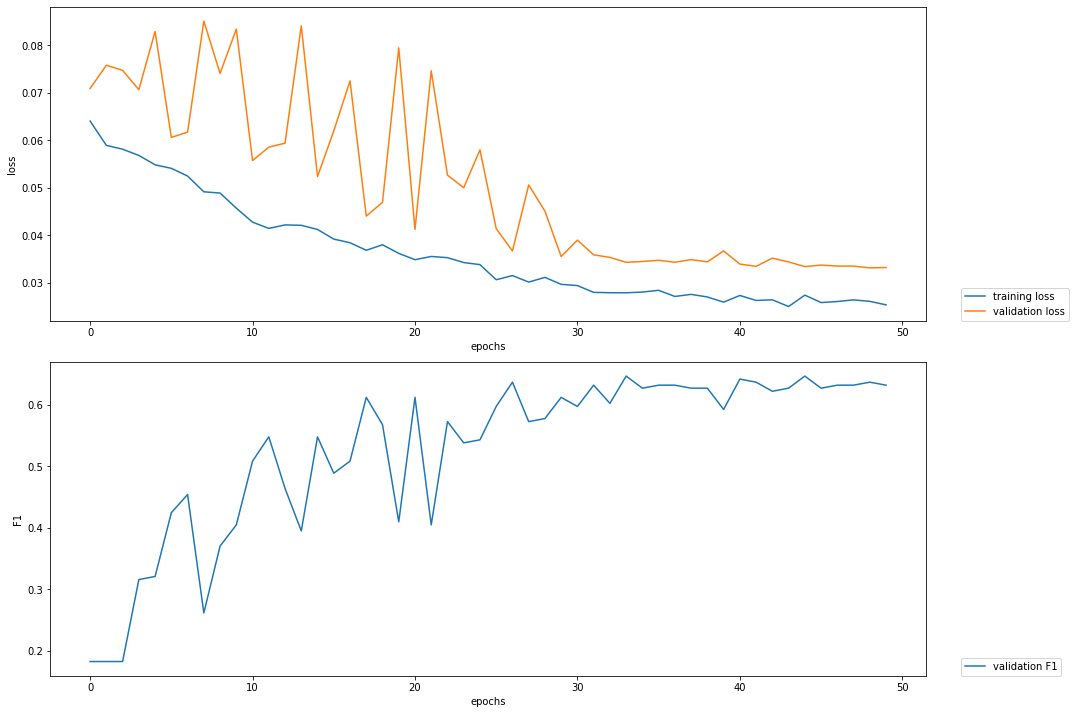

In [21]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('../resources/flair-acb-en/loss.tsv')

## (BONUS) ASSIGNMENT 4

Print the 5 most common errors (False Positives and False Negatives) from the results obtained above per type of ASPECT in the Sequence Labelling approach to ACD.

+ TODO Print the 5 most common errors from FOOD#QUALITY, etc.
+ TODO Train a polarity classifier for 

I decided to calculate and plot the confusion matrix instead of printing 5 most common errors. This way, we can have a global picture of all the predictions. We can know how many tags are predicted correctly by looking at the main diagonal. The numbers that are outside of the diagonal are mistakes. Numbers are colored using a logarthmic scale because there are many O tags. False positives and dalse negative related to O tag can be seen in the last row and column.

For example, I-FOOD#QUALITY there are 33 FN that were predicted as O and 101 FP that should have been predicted as O. Another common mistake is predicting beggining FOOD#QUALITY tags as intermediate (36).

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from matplotlib.colors import LogNorm

def get_tags(filename):
    gold_tags = []
    pred_tags = []
    with open(filename) as f:
        for line in f.readlines():
            if line != "\n":
                gold_tags.append(line.split()[1])
                pred_tags.append(line.split()[2])
    return gold_tags, pred_tags

def plot_confusion_matrix(cm, labels, cmap=plt.cm.BuPu):
    """
    This function plots the confusion matrix.
    """
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect="auto", norm=LogNorm(vmin=1, vmax=8846))
    x_tick_marks = np.arange(len(labels))
    y_tick_marks = np.arange(len(labels))
    plt.xticks(x_tick_marks, labels, rotation=90)
    plt.yticks(y_tick_marks, labels)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

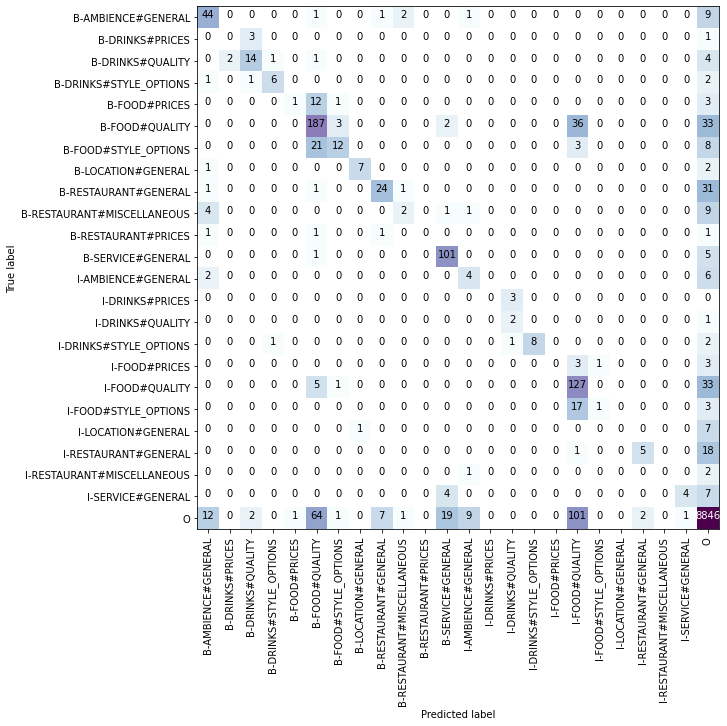

In [57]:
gold_tags, pred_tags = get_tags("../resources/flair-aspects-en/test.tsv")
cm = confusion_matrix(gold_tags, pred_tags)
labels = sorted(set(gold_tags))
plot_confusion_matrix(cm, labels)

In [4]:
from flair.data import Corpus                                                                                                                                                           
from flair.datasets import CSVClassificationCorpus
from flair.embeddings import WordEmbeddings, FlairEmbeddings, FastTextEmbeddings, DocumentRNNEmbeddings                                                             
from flair.models import TextClassifier                                                                                                                                                 
from flair.trainers import ModelTrainer
from flair.visual.training_curves import Plotter

In [6]:
# 1. define the existing columns in the dataset
columns = {1: "text", 0: "label_polarity"}

# 2. get the corpus
corpus: Corpus = CSVClassificationCorpus(data_folder='../datasets/absa2016',
                                        column_name_map=columns,
                                        label_type="label_polarity",
                                      train_file='en-train-polarity.tsv',
                                      dev_file=None,
                                      test_file='en-test-polarity.tsv',
                                      delimiter='\t')

# 3. obtain and print corpus statistics
print(corpus.obtain_statistics())

2022-03-01 21:26:24,337 Reading data from ../datasets/absa2016
2022-03-01 21:26:24,353 Train: ../datasets/absa2016/en-train-polarity.tsv
2022-03-01 21:26:24,357 Dev: None
2022-03-01 21:26:24,361 Test: ../datasets/absa2016/en-test-polarity.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 2256,
        "number_of_documents_per_class": {
            "negative": 679,
            "positive": 1484,
            "neutral": 93
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 37257,
            "min": 1,
            "max": 76,
            "avg": 16.51462765957447
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 859,
        "number_of_documents_per_class": {
            "positive": 611,
            "neutral": 44,
            "negative": 204
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 15648,
            "m

In [8]:
# 4. make a list of word embeddings
word_embeddings = [
                   WordEmbeddings('en-crawl'),
                   #FlairEmbeddings('news-forward'),
                   #FlairEmbeddings('news-backward'),
]

# 5. initialize document embedding by passing list of word embeddings                                                                                                                   
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)                                                                                                  
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                   hidden_size=512,
                                                                   reproject_words=True,
                                                                   reproject_words_dimension=256,
                                                                   rnn_type='LSTM',
)

In [10]:
# 6. create the label dictionary
label_dict = corpus.make_label_dictionary(label_type="label_polarity")

2022-03-01 21:27:50,973 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 2256/2256 [00:02<00:00, 952.61it/s] 

2022-03-01 21:27:54,307 Corpus contains the labels: label_polarity (#2256)
2022-03-01 21:27:54,309 Created (for label 'label_polarity') Dictionary with 3 tags: negative, positive, neutral


In [12]:
# 7. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, label_type="label_polarity")

In [13]:
# 8. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

In [14]:
# 9. start the training
trainer.train('../resources/flair-polarity-en',
              train_with_dev=False,
              max_epochs=50)

2022-03-01 21:28:09,176 ----------------------------------------------------------------------------------------------------
2022-03-01 21:28:09,181 Model: "TextClassifier(
  (loss_function): CrossEntropyLoss()
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('en-crawl')
    )
    (word_reprojection_map): Linear(in_features=300, out_features=256, bias=True)
    (rnn): LSTM(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=3, bias=True)
  (weights): None
  (weight_tensor) None
)"
2022-03-01 21:28:09,184 ----------------------------------------------------------------------------------------------------
2022-03-01 21:28:09,185 Corpus: "Corpus: 2256 train + 251 dev + 859 test sentences"
2022-03-01 21:28:09,188 ----------------------------------------------------------------------------------------------------
2022-03-01 21:28:09,189 Para

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:28:10,073 epoch 1 - iter 7/71 - loss 0.02947106 - samples/sec: 576.80 - lr: 0.100000
2022-03-01 21:28:10,393 epoch 1 - iter 14/71 - loss 0.02553674 - samples/sec: 799.32 - lr: 0.100000
2022-03-01 21:28:10,672 epoch 1 - iter 21/71 - loss 0.02491225 - samples/sec: 838.82 - lr: 0.100000
2022-03-01 21:28:11,559 epoch 1 - iter 28/71 - loss 0.02486888 - samples/sec: 949.52 - lr: 0.100000
2022-03-01 21:28:11,825 epoch 1 - iter 35/71 - loss 0.02393736 - samples/sec: 975.58 - lr: 0.100000
2022-03-01 21:28:12,069 epoch 1 - iter 42/71 - loss 0.02396226 - samples/sec: 943.75 - lr: 0.100000
2022-03-01 21:28:12,371 epoch 1 - iter 49/71 - loss 0.02334754 - samples/sec: 801.49 - lr: 0.100000
2022-03-01 21:28:12,673 epoch 1 - iter 56/71 - loss 0.02358757 - samples/sec: 808.81 - lr: 0.100000
2022-03-01 21:28:12,987 epoch 1 - iter 63/71 - loss 0.02405269 - samples/sec: 781.21 - lr: 0.100000
2022-03-01 21:28:13,299 epoch 1 - iter 70/71 - loss 0.02437105 - samples/sec: 737.54 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:28:32,971 epoch 2 - iter 7/71 - loss 0.02684371 - samples/sec: 509.50 - lr: 0.100000
2022-03-01 21:28:33,367 epoch 2 - iter 14/71 - loss 0.02466665 - samples/sec: 616.54 - lr: 0.100000
2022-03-01 21:28:33,800 epoch 2 - iter 21/71 - loss 0.02536060 - samples/sec: 558.27 - lr: 0.100000
2022-03-01 21:28:34,132 epoch 2 - iter 28/71 - loss 0.02494167 - samples/sec: 760.22 - lr: 0.100000
2022-03-01 21:28:34,447 epoch 2 - iter 35/71 - loss 0.02444571 - samples/sec: 731.56 - lr: 0.100000
2022-03-01 21:28:34,902 epoch 2 - iter 42/71 - loss 0.02425977 - samples/sec: 528.54 - lr: 0.100000
2022-03-01 21:28:35,212 epoch 2 - iter 49/71 - loss 0.02398503 - samples/sec: 782.80 - lr: 0.100000
2022-03-01 21:28:35,708 epoch 2 - iter 56/71 - loss 0.02355012 - samples/sec: 474.16 - lr: 0.100000
2022-03-01 21:28:35,981 epoch 2 - iter 63/71 - loss 0.02358849 - samples/sec: 839.19 - lr: 0.100000
2022-03-01 21:28:36,305 epoch 2 - iter 70/71 - loss 0.02350834 - samples/sec: 754.09 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:28:56,768 epoch 3 - iter 7/71 - loss 0.02393235 - samples/sec: 594.13 - lr: 0.100000
2022-03-01 21:28:57,112 epoch 3 - iter 14/71 - loss 0.02204276 - samples/sec: 704.17 - lr: 0.100000
2022-03-01 21:28:57,443 epoch 3 - iter 21/71 - loss 0.02225998 - samples/sec: 746.74 - lr: 0.100000
2022-03-01 21:28:57,773 epoch 3 - iter 28/71 - loss 0.02220516 - samples/sec: 739.25 - lr: 0.100000
2022-03-01 21:28:58,079 epoch 3 - iter 35/71 - loss 0.02208634 - samples/sec: 766.28 - lr: 0.100000
2022-03-01 21:28:59,799 epoch 3 - iter 42/71 - loss 0.02223793 - samples/sec: 648.23 - lr: 0.100000
2022-03-01 21:29:00,096 epoch 3 - iter 49/71 - loss 0.02227269 - samples/sec: 832.88 - lr: 0.100000
2022-03-01 21:29:00,352 epoch 3 - iter 56/71 - loss 0.02240575 - samples/sec: 891.22 - lr: 0.100000
2022-03-01 21:29:00,596 epoch 3 - iter 63/71 - loss 0.02238332 - samples/sec: 1087.72 - lr: 0.100000
2022-03-01 21:29:00,823 epoch 3 - iter 70/71 - loss 0.02210793 - samples/sec: 1029.15 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:29:19,849 epoch 4 - iter 7/71 - loss 0.02157123 - samples/sec: 654.67 - lr: 0.100000
2022-03-01 21:29:20,127 epoch 4 - iter 14/71 - loss 0.02079145 - samples/sec: 871.78 - lr: 0.100000
2022-03-01 21:29:20,405 epoch 4 - iter 21/71 - loss 0.02015239 - samples/sec: 895.02 - lr: 0.100000
2022-03-01 21:29:20,679 epoch 4 - iter 28/71 - loss 0.02036370 - samples/sec: 895.74 - lr: 0.100000
2022-03-01 21:29:20,990 epoch 4 - iter 35/71 - loss 0.02065747 - samples/sec: 846.62 - lr: 0.100000
2022-03-01 21:29:21,263 epoch 4 - iter 42/71 - loss 0.02053466 - samples/sec: 852.11 - lr: 0.100000
2022-03-01 21:29:21,557 epoch 4 - iter 49/71 - loss 0.02075958 - samples/sec: 893.67 - lr: 0.100000
2022-03-01 21:29:21,830 epoch 4 - iter 56/71 - loss 0.02072426 - samples/sec: 890.13 - lr: 0.100000
2022-03-01 21:29:22,089 epoch 4 - iter 63/71 - loss 0.02084414 - samples/sec: 997.93 - lr: 0.100000
2022-03-01 21:29:22,316 epoch 4 - iter 70/71 - loss 0.02079662 - samples/sec: 1012.46 - lr: 0.100000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:29:41,436 epoch 5 - iter 7/71 - loss 0.01699904 - samples/sec: 760.85 - lr: 0.100000
2022-03-01 21:29:41,708 epoch 5 - iter 14/71 - loss 0.01871392 - samples/sec: 839.94 - lr: 0.100000
2022-03-01 21:29:42,015 epoch 5 - iter 21/71 - loss 0.02003807 - samples/sec: 854.53 - lr: 0.100000
2022-03-01 21:29:42,285 epoch 5 - iter 28/71 - loss 0.01911910 - samples/sec: 863.83 - lr: 0.100000
2022-03-01 21:29:42,567 epoch 5 - iter 35/71 - loss 0.01943246 - samples/sec: 889.03 - lr: 0.100000
2022-03-01 21:29:42,845 epoch 5 - iter 42/71 - loss 0.01962975 - samples/sec: 896.53 - lr: 0.100000
2022-03-01 21:29:43,094 epoch 5 - iter 49/71 - loss 0.01992675 - samples/sec: 945.62 - lr: 0.100000
2022-03-01 21:29:43,398 epoch 5 - iter 56/71 - loss 0.01995014 - samples/sec: 884.47 - lr: 0.100000
2022-03-01 21:29:43,643 epoch 5 - iter 63/71 - loss 0.01990411 - samples/sec: 938.40 - lr: 0.100000
2022-03-01 21:29:45,194 epoch 5 - iter 70/71 - loss 0.01977644 - samples/sec: 909.73 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:30:05,417 epoch 6 - iter 7/71 - loss 0.02110147 - samples/sec: 610.00 - lr: 0.100000
2022-03-01 21:30:05,717 epoch 6 - iter 14/71 - loss 0.01977460 - samples/sec: 834.19 - lr: 0.100000
2022-03-01 21:30:05,991 epoch 6 - iter 21/71 - loss 0.02089064 - samples/sec: 829.61 - lr: 0.100000
2022-03-01 21:30:06,290 epoch 6 - iter 28/71 - loss 0.01978578 - samples/sec: 868.70 - lr: 0.100000
2022-03-01 21:30:06,579 epoch 6 - iter 35/71 - loss 0.02004035 - samples/sec: 963.66 - lr: 0.100000
2022-03-01 21:30:06,874 epoch 6 - iter 42/71 - loss 0.01994834 - samples/sec: 845.63 - lr: 0.100000
2022-03-01 21:30:07,144 epoch 6 - iter 49/71 - loss 0.01987056 - samples/sec: 854.41 - lr: 0.100000
2022-03-01 21:30:07,443 epoch 6 - iter 56/71 - loss 0.01950136 - samples/sec: 852.77 - lr: 0.100000
2022-03-01 21:30:07,673 epoch 6 - iter 63/71 - loss 0.01948081 - samples/sec: 1000.12 - lr: 0.100000
2022-03-01 21:30:07,905 epoch 6 - iter 70/71 - loss 0.01941684 - samples/sec: 1057.07 - lr: 0.100000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:30:27,348 epoch 7 - iter 7/71 - loss 0.01606758 - samples/sec: 612.95 - lr: 0.100000
2022-03-01 21:30:27,616 epoch 7 - iter 14/71 - loss 0.01829542 - samples/sec: 897.66 - lr: 0.100000
2022-03-01 21:30:27,897 epoch 7 - iter 21/71 - loss 0.01784635 - samples/sec: 903.57 - lr: 0.100000
2022-03-01 21:30:28,182 epoch 7 - iter 28/71 - loss 0.01806406 - samples/sec: 907.31 - lr: 0.100000
2022-03-01 21:30:28,468 epoch 7 - iter 35/71 - loss 0.01784052 - samples/sec: 842.83 - lr: 0.100000
2022-03-01 21:30:28,790 epoch 7 - iter 42/71 - loss 0.01796392 - samples/sec: 790.81 - lr: 0.100000
2022-03-01 21:30:29,103 epoch 7 - iter 49/71 - loss 0.01816417 - samples/sec: 806.47 - lr: 0.100000
2022-03-01 21:30:29,368 epoch 7 - iter 56/71 - loss 0.01846771 - samples/sec: 891.13 - lr: 0.100000
2022-03-01 21:30:29,614 epoch 7 - iter 63/71 - loss 0.01836029 - samples/sec: 1041.58 - lr: 0.100000
2022-03-01 21:30:29,877 epoch 7 - iter 70/71 - loss 0.01877359 - samples/sec: 914.85 - lr: 0.100000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:30:50,132 epoch 8 - iter 7/71 - loss 0.01699674 - samples/sec: 732.89 - lr: 0.100000
2022-03-01 21:30:50,407 epoch 8 - iter 14/71 - loss 0.01870871 - samples/sec: 877.53 - lr: 0.100000
2022-03-01 21:30:50,688 epoch 8 - iter 21/71 - loss 0.01856428 - samples/sec: 912.78 - lr: 0.100000
2022-03-01 21:30:50,954 epoch 8 - iter 28/71 - loss 0.01804387 - samples/sec: 873.91 - lr: 0.100000
2022-03-01 21:30:51,262 epoch 8 - iter 35/71 - loss 0.01814135 - samples/sec: 836.26 - lr: 0.100000
2022-03-01 21:30:51,525 epoch 8 - iter 42/71 - loss 0.01804651 - samples/sec: 912.32 - lr: 0.100000
2022-03-01 21:30:51,775 epoch 8 - iter 49/71 - loss 0.01793396 - samples/sec: 992.81 - lr: 0.100000
2022-03-01 21:30:52,052 epoch 8 - iter 56/71 - loss 0.01780614 - samples/sec: 922.53 - lr: 0.100000
2022-03-01 21:30:52,299 epoch 8 - iter 63/71 - loss 0.01788659 - samples/sec: 983.82 - lr: 0.100000
2022-03-01 21:30:52,529 epoch 8 - iter 70/71 - loss 0.01772200 - samples/sec: 1053.84 - lr: 0.100000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:30:56,538 epoch 9 - iter 7/71 - loss 0.01527229 - samples/sec: 409.80 - lr: 0.100000
2022-03-01 21:30:56,972 epoch 9 - iter 14/71 - loss 0.01634608 - samples/sec: 559.92 - lr: 0.100000
2022-03-01 21:30:57,526 epoch 9 - iter 21/71 - loss 0.01759620 - samples/sec: 460.09 - lr: 0.100000
2022-03-01 21:30:57,946 epoch 9 - iter 28/71 - loss 0.01832970 - samples/sec: 610.01 - lr: 0.100000
2022-03-01 21:30:58,490 epoch 9 - iter 35/71 - loss 0.01812752 - samples/sec: 464.54 - lr: 0.100000
2022-03-01 21:30:58,899 epoch 9 - iter 42/71 - loss 0.01787867 - samples/sec: 611.29 - lr: 0.100000
2022-03-01 21:30:59,404 epoch 9 - iter 49/71 - loss 0.01744050 - samples/sec: 492.88 - lr: 0.100000
2022-03-01 21:30:59,769 epoch 9 - iter 56/71 - loss 0.01738528 - samples/sec: 654.14 - lr: 0.100000
2022-03-01 21:31:00,224 epoch 9 - iter 63/71 - loss 0.01733546 - samples/sec: 571.45 - lr: 0.100000
2022-03-01 21:31:00,628 epoch 9 - iter 70/71 - loss 0.01756658 - samples/sec: 575.63 - lr: 0.100000
2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:31:05,807 epoch 10 - iter 7/71 - loss 0.01655833 - samples/sec: 354.68 - lr: 0.100000
2022-03-01 21:31:06,254 epoch 10 - iter 14/71 - loss 0.01699944 - samples/sec: 516.98 - lr: 0.100000
2022-03-01 21:31:08,455 epoch 10 - iter 21/71 - loss 0.01767269 - samples/sec: 533.19 - lr: 0.100000
2022-03-01 21:31:08,807 epoch 10 - iter 28/71 - loss 0.01735560 - samples/sec: 723.31 - lr: 0.100000
2022-03-01 21:31:09,065 epoch 10 - iter 35/71 - loss 0.01706731 - samples/sec: 950.36 - lr: 0.100000
2022-03-01 21:31:09,361 epoch 10 - iter 42/71 - loss 0.01712812 - samples/sec: 825.47 - lr: 0.100000
2022-03-01 21:31:09,642 epoch 10 - iter 49/71 - loss 0.01711642 - samples/sec: 849.07 - lr: 0.100000
2022-03-01 21:31:09,904 epoch 10 - iter 56/71 - loss 0.01729471 - samples/sec: 880.98 - lr: 0.100000
2022-03-01 21:31:10,157 epoch 10 - iter 63/71 - loss 0.01733707 - samples/sec: 1026.50 - lr: 0.100000
2022-03-01 21:31:10,378 epoch 10 - iter 70/71 - loss 0.01743385 - samples/sec: 1086.43 - lr

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:31:29,299 epoch 11 - iter 7/71 - loss 0.02050060 - samples/sec: 646.88 - lr: 0.100000
2022-03-01 21:31:29,598 epoch 11 - iter 14/71 - loss 0.01838610 - samples/sec: 844.38 - lr: 0.100000
2022-03-01 21:31:29,889 epoch 11 - iter 21/71 - loss 0.01723565 - samples/sec: 828.42 - lr: 0.100000
2022-03-01 21:31:30,171 epoch 11 - iter 28/71 - loss 0.01761151 - samples/sec: 875.09 - lr: 0.100000
2022-03-01 21:31:30,482 epoch 11 - iter 35/71 - loss 0.01741701 - samples/sec: 834.42 - lr: 0.100000
2022-03-01 21:31:30,761 epoch 11 - iter 42/71 - loss 0.01694279 - samples/sec: 885.82 - lr: 0.100000
2022-03-01 21:31:31,060 epoch 11 - iter 49/71 - loss 0.01692345 - samples/sec: 854.49 - lr: 0.100000
2022-03-01 21:31:31,331 epoch 11 - iter 56/71 - loss 0.01673285 - samples/sec: 863.48 - lr: 0.100000
2022-03-01 21:31:31,589 epoch 11 - iter 63/71 - loss 0.01713227 - samples/sec: 989.01 - lr: 0.100000
2022-03-01 21:31:31,821 epoch 11 - iter 70/71 - loss 0.01727971 - samples/sec: 1001.62 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:31:35,597 epoch 12 - iter 7/71 - loss 0.01768836 - samples/sec: 675.87 - lr: 0.100000
2022-03-01 21:31:35,881 epoch 12 - iter 14/71 - loss 0.01769540 - samples/sec: 823.95 - lr: 0.100000
2022-03-01 21:31:36,473 epoch 12 - iter 21/71 - loss 0.01731981 - samples/sec: 451.52 - lr: 0.100000
2022-03-01 21:31:36,938 epoch 12 - iter 28/71 - loss 0.01686579 - samples/sec: 514.88 - lr: 0.100000
2022-03-01 21:31:37,506 epoch 12 - iter 35/71 - loss 0.01749449 - samples/sec: 447.72 - lr: 0.100000
2022-03-01 21:31:39,855 epoch 12 - iter 42/71 - loss 0.01696029 - samples/sec: 637.09 - lr: 0.100000
2022-03-01 21:31:40,539 epoch 12 - iter 49/71 - loss 0.01699065 - samples/sec: 360.73 - lr: 0.100000
2022-03-01 21:31:41,030 epoch 12 - iter 56/71 - loss 0.01737167 - samples/sec: 483.02 - lr: 0.100000
2022-03-01 21:31:41,572 epoch 12 - iter 63/71 - loss 0.01713888 - samples/sec: 473.88 - lr: 0.100000
2022-03-01 21:31:41,850 epoch 12 - iter 70/71 - loss 0.01727343 - samples/sec: 852.05 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:31:46,817 epoch 13 - iter 7/71 - loss 0.01850108 - samples/sec: 510.79 - lr: 0.100000
2022-03-01 21:31:47,242 epoch 13 - iter 14/71 - loss 0.01689915 - samples/sec: 537.99 - lr: 0.100000
2022-03-01 21:31:47,735 epoch 13 - iter 21/71 - loss 0.01681359 - samples/sec: 529.95 - lr: 0.100000
2022-03-01 21:31:48,186 epoch 13 - iter 28/71 - loss 0.01629539 - samples/sec: 561.39 - lr: 0.100000
2022-03-01 21:31:48,634 epoch 13 - iter 35/71 - loss 0.01619078 - samples/sec: 524.52 - lr: 0.100000
2022-03-01 21:31:49,041 epoch 13 - iter 42/71 - loss 0.01635201 - samples/sec: 615.14 - lr: 0.100000
2022-03-01 21:31:49,339 epoch 13 - iter 49/71 - loss 0.01647214 - samples/sec: 800.71 - lr: 0.100000
2022-03-01 21:31:49,618 epoch 13 - iter 56/71 - loss 0.01654628 - samples/sec: 891.83 - lr: 0.100000
2022-03-01 21:31:49,890 epoch 13 - iter 63/71 - loss 0.01681956 - samples/sec: 917.32 - lr: 0.100000
2022-03-01 21:31:50,156 epoch 13 - iter 70/71 - loss 0.01676338 - samples/sec: 931.71 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:31:53,251 epoch 14 - iter 7/71 - loss 0.01832509 - samples/sec: 624.40 - lr: 0.100000
2022-03-01 21:31:53,551 epoch 14 - iter 14/71 - loss 0.01677988 - samples/sec: 863.03 - lr: 0.100000
2022-03-01 21:31:53,826 epoch 14 - iter 21/71 - loss 0.01619649 - samples/sec: 906.12 - lr: 0.100000
2022-03-01 21:31:54,117 epoch 14 - iter 28/71 - loss 0.01648284 - samples/sec: 910.66 - lr: 0.100000
2022-03-01 21:31:54,394 epoch 14 - iter 35/71 - loss 0.01682196 - samples/sec: 886.62 - lr: 0.100000
2022-03-01 21:31:54,643 epoch 14 - iter 42/71 - loss 0.01682826 - samples/sec: 942.31 - lr: 0.100000
2022-03-01 21:31:56,273 epoch 14 - iter 49/71 - loss 0.01662421 - samples/sec: 909.39 - lr: 0.100000
2022-03-01 21:31:56,524 epoch 14 - iter 56/71 - loss 0.01644579 - samples/sec: 925.18 - lr: 0.100000
2022-03-01 21:31:56,782 epoch 14 - iter 63/71 - loss 0.01647680 - samples/sec: 1023.48 - lr: 0.100000
2022-03-01 21:31:57,021 epoch 14 - iter 70/71 - loss 0.01654229 - samples/sec: 983.19 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:32:00,035 epoch 15 - iter 7/71 - loss 0.01776639 - samples/sec: 639.34 - lr: 0.050000
2022-03-01 21:32:00,319 epoch 15 - iter 14/71 - loss 0.01745052 - samples/sec: 823.94 - lr: 0.050000
2022-03-01 21:32:00,600 epoch 15 - iter 21/71 - loss 0.01646009 - samples/sec: 885.07 - lr: 0.050000
2022-03-01 21:32:00,893 epoch 15 - iter 28/71 - loss 0.01588983 - samples/sec: 847.26 - lr: 0.050000
2022-03-01 21:32:01,160 epoch 15 - iter 35/71 - loss 0.01605285 - samples/sec: 883.83 - lr: 0.050000
2022-03-01 21:32:01,475 epoch 15 - iter 42/71 - loss 0.01611871 - samples/sec: 850.23 - lr: 0.050000
2022-03-01 21:32:01,738 epoch 15 - iter 49/71 - loss 0.01616737 - samples/sec: 864.06 - lr: 0.050000
2022-03-01 21:32:02,033 epoch 15 - iter 56/71 - loss 0.01615631 - samples/sec: 870.88 - lr: 0.050000
2022-03-01 21:32:02,298 epoch 15 - iter 63/71 - loss 0.01577192 - samples/sec: 938.19 - lr: 0.050000
2022-03-01 21:32:02,527 epoch 15 - iter 70/71 - loss 0.01570205 - samples/sec: 1060.73 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:32:05,487 epoch 16 - iter 7/71 - loss 0.01389829 - samples/sec: 609.67 - lr: 0.050000
2022-03-01 21:32:05,764 epoch 16 - iter 14/71 - loss 0.01293756 - samples/sec: 837.29 - lr: 0.050000
2022-03-01 21:32:06,062 epoch 16 - iter 21/71 - loss 0.01367770 - samples/sec: 865.55 - lr: 0.050000
2022-03-01 21:32:06,373 epoch 16 - iter 28/71 - loss 0.01393471 - samples/sec: 835.42 - lr: 0.050000
2022-03-01 21:32:06,637 epoch 16 - iter 35/71 - loss 0.01464501 - samples/sec: 906.93 - lr: 0.050000
2022-03-01 21:32:06,927 epoch 16 - iter 42/71 - loss 0.01491411 - samples/sec: 879.69 - lr: 0.050000
2022-03-01 21:32:07,197 epoch 16 - iter 49/71 - loss 0.01519181 - samples/sec: 847.25 - lr: 0.050000
2022-03-01 21:32:07,499 epoch 16 - iter 56/71 - loss 0.01540108 - samples/sec: 844.76 - lr: 0.050000
2022-03-01 21:32:07,749 epoch 16 - iter 63/71 - loss 0.01573910 - samples/sec: 985.01 - lr: 0.050000
2022-03-01 21:32:08,003 epoch 16 - iter 70/71 - loss 0.01552510 - samples/sec: 995.96 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:32:12,486 epoch 17 - iter 7/71 - loss 0.01236092 - samples/sec: 687.04 - lr: 0.050000
2022-03-01 21:32:12,753 epoch 17 - iter 14/71 - loss 0.01451159 - samples/sec: 882.73 - lr: 0.050000
2022-03-01 21:32:13,063 epoch 17 - iter 21/71 - loss 0.01453521 - samples/sec: 800.85 - lr: 0.050000
2022-03-01 21:32:13,324 epoch 17 - iter 28/71 - loss 0.01495254 - samples/sec: 966.93 - lr: 0.050000
2022-03-01 21:32:13,616 epoch 17 - iter 35/71 - loss 0.01534698 - samples/sec: 843.32 - lr: 0.050000
2022-03-01 21:32:13,900 epoch 17 - iter 42/71 - loss 0.01541097 - samples/sec: 853.30 - lr: 0.050000
2022-03-01 21:32:14,191 epoch 17 - iter 49/71 - loss 0.01534345 - samples/sec: 911.07 - lr: 0.050000
2022-03-01 21:32:14,454 epoch 17 - iter 56/71 - loss 0.01556678 - samples/sec: 903.93 - lr: 0.050000
2022-03-01 21:32:14,746 epoch 17 - iter 63/71 - loss 0.01526015 - samples/sec: 883.47 - lr: 0.050000
2022-03-01 21:32:14,994 epoch 17 - iter 70/71 - loss 0.01545468 - samples/sec: 965.95 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:32:33,813 epoch 18 - iter 7/71 - loss 0.01677920 - samples/sec: 757.19 - lr: 0.050000
2022-03-01 21:32:34,083 epoch 18 - iter 14/71 - loss 0.01667190 - samples/sec: 870.08 - lr: 0.050000
2022-03-01 21:32:34,402 epoch 18 - iter 21/71 - loss 0.01618393 - samples/sec: 841.99 - lr: 0.050000
2022-03-01 21:32:34,704 epoch 18 - iter 28/71 - loss 0.01553806 - samples/sec: 809.89 - lr: 0.050000
2022-03-01 21:32:34,971 epoch 18 - iter 35/71 - loss 0.01550405 - samples/sec: 913.49 - lr: 0.050000
2022-03-01 21:32:35,253 epoch 18 - iter 42/71 - loss 0.01562890 - samples/sec: 890.03 - lr: 0.050000
2022-03-01 21:32:35,538 epoch 18 - iter 49/71 - loss 0.01553782 - samples/sec: 889.54 - lr: 0.050000
2022-03-01 21:32:35,824 epoch 18 - iter 56/71 - loss 0.01526009 - samples/sec: 873.40 - lr: 0.050000
2022-03-01 21:32:36,129 epoch 18 - iter 63/71 - loss 0.01522216 - samples/sec: 771.99 - lr: 0.050000
2022-03-01 21:32:36,363 epoch 18 - iter 70/71 - loss 0.01528700 - samples/sec: 1055.39 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:32:41,852 epoch 19 - iter 7/71 - loss 0.01425285 - samples/sec: 502.61 - lr: 0.050000
2022-03-01 21:32:42,290 epoch 19 - iter 14/71 - loss 0.01383560 - samples/sec: 534.19 - lr: 0.050000
2022-03-01 21:32:42,772 epoch 19 - iter 21/71 - loss 0.01372473 - samples/sec: 514.64 - lr: 0.050000
2022-03-01 21:32:43,148 epoch 19 - iter 28/71 - loss 0.01420040 - samples/sec: 675.69 - lr: 0.050000
2022-03-01 21:32:43,575 epoch 19 - iter 35/71 - loss 0.01423513 - samples/sec: 546.91 - lr: 0.050000
2022-03-01 21:32:43,961 epoch 19 - iter 42/71 - loss 0.01423394 - samples/sec: 629.08 - lr: 0.050000
2022-03-01 21:32:44,405 epoch 19 - iter 49/71 - loss 0.01452521 - samples/sec: 547.69 - lr: 0.050000
2022-03-01 21:32:44,797 epoch 19 - iter 56/71 - loss 0.01497953 - samples/sec: 585.20 - lr: 0.050000
2022-03-01 21:32:45,179 epoch 19 - iter 63/71 - loss 0.01520564 - samples/sec: 666.13 - lr: 0.050000
2022-03-01 21:32:45,544 epoch 19 - iter 70/71 - loss 0.01538019 - samples/sec: 641.97 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:32:50,636 epoch 20 - iter 7/71 - loss 0.01571268 - samples/sec: 407.71 - lr: 0.050000
2022-03-01 21:32:50,985 epoch 20 - iter 14/71 - loss 0.01538612 - samples/sec: 692.84 - lr: 0.050000
2022-03-01 21:32:51,501 epoch 20 - iter 21/71 - loss 0.01571329 - samples/sec: 487.73 - lr: 0.050000
2022-03-01 21:32:51,893 epoch 20 - iter 28/71 - loss 0.01535825 - samples/sec: 657.09 - lr: 0.050000
2022-03-01 21:32:52,326 epoch 20 - iter 35/71 - loss 0.01503142 - samples/sec: 539.37 - lr: 0.050000
2022-03-01 21:32:52,811 epoch 20 - iter 42/71 - loss 0.01526278 - samples/sec: 527.15 - lr: 0.050000
2022-03-01 21:32:53,271 epoch 20 - iter 49/71 - loss 0.01541713 - samples/sec: 546.56 - lr: 0.050000
2022-03-01 21:32:53,714 epoch 20 - iter 56/71 - loss 0.01534500 - samples/sec: 518.73 - lr: 0.050000
2022-03-01 21:32:54,096 epoch 20 - iter 63/71 - loss 0.01552354 - samples/sec: 672.17 - lr: 0.050000
2022-03-01 21:32:54,339 epoch 20 - iter 70/71 - loss 0.01533086 - samples/sec: 971.31 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:32:57,696 epoch 21 - iter 7/71 - loss 0.01711786 - samples/sec: 670.54 - lr: 0.050000
2022-03-01 21:32:57,969 epoch 21 - iter 14/71 - loss 0.01627051 - samples/sec: 876.93 - lr: 0.050000
2022-03-01 21:32:58,272 epoch 21 - iter 21/71 - loss 0.01637506 - samples/sec: 869.45 - lr: 0.050000
2022-03-01 21:32:59,940 epoch 21 - iter 28/71 - loss 0.01642727 - samples/sec: 877.08 - lr: 0.050000
2022-03-01 21:33:00,201 epoch 21 - iter 35/71 - loss 0.01580875 - samples/sec: 914.06 - lr: 0.050000
2022-03-01 21:33:00,487 epoch 21 - iter 42/71 - loss 0.01567863 - samples/sec: 883.08 - lr: 0.050000
2022-03-01 21:33:00,758 epoch 21 - iter 49/71 - loss 0.01611236 - samples/sec: 855.88 - lr: 0.050000
2022-03-01 21:33:01,051 epoch 21 - iter 56/71 - loss 0.01605866 - samples/sec: 859.74 - lr: 0.050000
2022-03-01 21:33:01,295 epoch 21 - iter 63/71 - loss 0.01587966 - samples/sec: 994.75 - lr: 0.050000
2022-03-01 21:33:01,511 epoch 21 - iter 70/71 - loss 0.01579173 - samples/sec: 1076.93 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:33:20,387 epoch 22 - iter 7/71 - loss 0.01572506 - samples/sec: 600.55 - lr: 0.050000
2022-03-01 21:33:20,676 epoch 22 - iter 14/71 - loss 0.01423722 - samples/sec: 882.13 - lr: 0.050000
2022-03-01 21:33:20,961 epoch 22 - iter 21/71 - loss 0.01503376 - samples/sec: 902.18 - lr: 0.050000
2022-03-01 21:33:21,238 epoch 22 - iter 28/71 - loss 0.01503174 - samples/sec: 885.24 - lr: 0.050000
2022-03-01 21:33:21,533 epoch 22 - iter 35/71 - loss 0.01547015 - samples/sec: 800.27 - lr: 0.050000
2022-03-01 21:33:21,842 epoch 22 - iter 42/71 - loss 0.01556727 - samples/sec: 844.50 - lr: 0.050000
2022-03-01 21:33:22,090 epoch 22 - iter 49/71 - loss 0.01562850 - samples/sec: 928.26 - lr: 0.050000
2022-03-01 21:33:22,404 epoch 22 - iter 56/71 - loss 0.01522970 - samples/sec: 808.87 - lr: 0.050000
2022-03-01 21:33:22,644 epoch 22 - iter 63/71 - loss 0.01523716 - samples/sec: 1042.16 - lr: 0.050000
2022-03-01 21:33:22,892 epoch 22 - iter 70/71 - loss 0.01541812 - samples/sec: 981.93 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:33:27,086 epoch 23 - iter 7/71 - loss 0.01376111 - samples/sec: 461.24 - lr: 0.050000
2022-03-01 21:33:27,634 epoch 23 - iter 14/71 - loss 0.01530183 - samples/sec: 420.68 - lr: 0.050000
2022-03-01 21:33:28,057 epoch 23 - iter 21/71 - loss 0.01520796 - samples/sec: 591.45 - lr: 0.050000
2022-03-01 21:33:28,505 epoch 23 - iter 28/71 - loss 0.01543162 - samples/sec: 534.46 - lr: 0.050000
2022-03-01 21:33:28,993 epoch 23 - iter 35/71 - loss 0.01527091 - samples/sec: 541.08 - lr: 0.050000
2022-03-01 21:33:29,521 epoch 23 - iter 42/71 - loss 0.01548589 - samples/sec: 452.42 - lr: 0.050000
2022-03-01 21:33:31,933 epoch 23 - iter 49/71 - loss 0.01541565 - samples/sec: 495.76 - lr: 0.050000
2022-03-01 21:33:32,432 epoch 23 - iter 56/71 - loss 0.01531187 - samples/sec: 486.79 - lr: 0.050000
2022-03-01 21:33:32,884 epoch 23 - iter 63/71 - loss 0.01532582 - samples/sec: 518.52 - lr: 0.050000
2022-03-01 21:33:33,321 epoch 23 - iter 70/71 - loss 0.01547853 - samples/sec: 552.21 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:33:38,606 epoch 24 - iter 7/71 - loss 0.01416810 - samples/sec: 659.05 - lr: 0.050000
2022-03-01 21:33:38,915 epoch 24 - iter 14/71 - loss 0.01348705 - samples/sec: 833.03 - lr: 0.050000
2022-03-01 21:33:39,238 epoch 24 - iter 21/71 - loss 0.01560212 - samples/sec: 743.08 - lr: 0.050000
2022-03-01 21:33:39,542 epoch 24 - iter 28/71 - loss 0.01585572 - samples/sec: 898.83 - lr: 0.050000
2022-03-01 21:33:39,841 epoch 24 - iter 35/71 - loss 0.01604504 - samples/sec: 882.68 - lr: 0.050000
2022-03-01 21:33:40,192 epoch 24 - iter 42/71 - loss 0.01599701 - samples/sec: 689.55 - lr: 0.050000
2022-03-01 21:33:40,481 epoch 24 - iter 49/71 - loss 0.01570228 - samples/sec: 835.84 - lr: 0.050000
2022-03-01 21:33:40,779 epoch 24 - iter 56/71 - loss 0.01549565 - samples/sec: 888.95 - lr: 0.050000
2022-03-01 21:33:41,014 epoch 24 - iter 63/71 - loss 0.01559874 - samples/sec: 990.63 - lr: 0.050000
2022-03-01 21:33:41,260 epoch 24 - iter 70/71 - loss 0.01558933 - samples/sec: 958.63 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:33:44,571 epoch 25 - iter 7/71 - loss 0.01869767 - samples/sec: 718.38 - lr: 0.050000
2022-03-01 21:33:44,851 epoch 25 - iter 14/71 - loss 0.01623071 - samples/sec: 917.25 - lr: 0.050000
2022-03-01 21:33:45,116 epoch 25 - iter 21/71 - loss 0.01521099 - samples/sec: 915.17 - lr: 0.050000
2022-03-01 21:33:45,408 epoch 25 - iter 28/71 - loss 0.01483754 - samples/sec: 810.54 - lr: 0.050000
2022-03-01 21:33:45,693 epoch 25 - iter 35/71 - loss 0.01502635 - samples/sec: 873.45 - lr: 0.050000
2022-03-01 21:33:45,985 epoch 25 - iter 42/71 - loss 0.01496424 - samples/sec: 844.88 - lr: 0.050000
2022-03-01 21:33:46,281 epoch 25 - iter 49/71 - loss 0.01493776 - samples/sec: 875.63 - lr: 0.050000
2022-03-01 21:33:46,565 epoch 25 - iter 56/71 - loss 0.01522270 - samples/sec: 875.14 - lr: 0.050000
2022-03-01 21:33:46,827 epoch 25 - iter 63/71 - loss 0.01542773 - samples/sec: 929.03 - lr: 0.050000
2022-03-01 21:33:48,441 epoch 25 - iter 70/71 - loss 0.01518743 - samples/sec: 1002.71 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:33:51,761 epoch 26 - iter 7/71 - loss 0.01480975 - samples/sec: 620.03 - lr: 0.025000
2022-03-01 21:33:52,104 epoch 26 - iter 14/71 - loss 0.01483956 - samples/sec: 778.46 - lr: 0.025000
2022-03-01 21:33:52,388 epoch 26 - iter 21/71 - loss 0.01572544 - samples/sec: 820.54 - lr: 0.025000
2022-03-01 21:33:52,719 epoch 26 - iter 28/71 - loss 0.01603464 - samples/sec: 778.55 - lr: 0.025000
2022-03-01 21:33:52,995 epoch 26 - iter 35/71 - loss 0.01585676 - samples/sec: 855.43 - lr: 0.025000
2022-03-01 21:33:53,280 epoch 26 - iter 42/71 - loss 0.01551654 - samples/sec: 875.72 - lr: 0.025000
2022-03-01 21:33:53,559 epoch 26 - iter 49/71 - loss 0.01525633 - samples/sec: 897.23 - lr: 0.025000
2022-03-01 21:33:53,835 epoch 26 - iter 56/71 - loss 0.01471642 - samples/sec: 953.55 - lr: 0.025000
2022-03-01 21:33:54,099 epoch 26 - iter 63/71 - loss 0.01471888 - samples/sec: 893.80 - lr: 0.025000
2022-03-01 21:33:54,330 epoch 26 - iter 70/71 - loss 0.01489527 - samples/sec: 1035.27 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:33:57,701 epoch 27 - iter 7/71 - loss 0.01445232 - samples/sec: 639.14 - lr: 0.025000
2022-03-01 21:33:58,008 epoch 27 - iter 14/71 - loss 0.01431151 - samples/sec: 856.80 - lr: 0.025000
2022-03-01 21:33:58,320 epoch 27 - iter 21/71 - loss 0.01504577 - samples/sec: 852.08 - lr: 0.025000
2022-03-01 21:33:58,591 epoch 27 - iter 28/71 - loss 0.01489753 - samples/sec: 840.34 - lr: 0.025000
2022-03-01 21:33:58,883 epoch 27 - iter 35/71 - loss 0.01505339 - samples/sec: 798.81 - lr: 0.025000
2022-03-01 21:33:59,171 epoch 27 - iter 42/71 - loss 0.01515736 - samples/sec: 891.43 - lr: 0.025000
2022-03-01 21:33:59,472 epoch 27 - iter 49/71 - loss 0.01500227 - samples/sec: 909.06 - lr: 0.025000
2022-03-01 21:33:59,732 epoch 27 - iter 56/71 - loss 0.01488541 - samples/sec: 879.23 - lr: 0.025000
2022-03-01 21:33:59,994 epoch 27 - iter 63/71 - loss 0.01477662 - samples/sec: 947.55 - lr: 0.025000
2022-03-01 21:34:00,217 epoch 27 - iter 70/71 - loss 0.01487295 - samples/sec: 1073.34 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:04,902 epoch 28 - iter 7/71 - loss 0.01293215 - samples/sec: 724.42 - lr: 0.025000
2022-03-01 21:34:05,177 epoch 28 - iter 14/71 - loss 0.01474842 - samples/sec: 884.05 - lr: 0.025000
2022-03-01 21:34:05,496 epoch 28 - iter 21/71 - loss 0.01468490 - samples/sec: 780.08 - lr: 0.025000
2022-03-01 21:34:05,757 epoch 28 - iter 28/71 - loss 0.01483107 - samples/sec: 877.44 - lr: 0.025000
2022-03-01 21:34:06,042 epoch 28 - iter 35/71 - loss 0.01468760 - samples/sec: 916.73 - lr: 0.025000
2022-03-01 21:34:06,306 epoch 28 - iter 42/71 - loss 0.01474491 - samples/sec: 869.41 - lr: 0.025000
2022-03-01 21:34:07,837 epoch 28 - iter 49/71 - loss 0.01487857 - samples/sec: 830.64 - lr: 0.025000
2022-03-01 21:34:08,097 epoch 28 - iter 56/71 - loss 0.01508036 - samples/sec: 931.27 - lr: 0.025000
2022-03-01 21:34:08,372 epoch 28 - iter 63/71 - loss 0.01497129 - samples/sec: 915.08 - lr: 0.025000
2022-03-01 21:34:08,589 epoch 28 - iter 70/71 - loss 0.01488700 - samples/sec: 1101.30 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:11,828 epoch 29 - iter 7/71 - loss 0.01615676 - samples/sec: 836.15 - lr: 0.025000
2022-03-01 21:34:12,125 epoch 29 - iter 14/71 - loss 0.01456289 - samples/sec: 857.55 - lr: 0.025000
2022-03-01 21:34:12,445 epoch 29 - iter 21/71 - loss 0.01416039 - samples/sec: 805.88 - lr: 0.025000
2022-03-01 21:34:12,715 epoch 29 - iter 28/71 - loss 0.01458254 - samples/sec: 904.54 - lr: 0.025000
2022-03-01 21:34:13,001 epoch 29 - iter 35/71 - loss 0.01434241 - samples/sec: 865.84 - lr: 0.025000
2022-03-01 21:34:13,293 epoch 29 - iter 42/71 - loss 0.01467797 - samples/sec: 857.73 - lr: 0.025000
2022-03-01 21:34:13,576 epoch 29 - iter 49/71 - loss 0.01448061 - samples/sec: 832.61 - lr: 0.025000
2022-03-01 21:34:13,863 epoch 29 - iter 56/71 - loss 0.01461286 - samples/sec: 904.87 - lr: 0.025000
2022-03-01 21:34:14,121 epoch 29 - iter 63/71 - loss 0.01441591 - samples/sec: 969.90 - lr: 0.025000
2022-03-01 21:34:14,351 epoch 29 - iter 70/71 - loss 0.01461792 - samples/sec: 1082.03 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:17,621 epoch 30 - iter 7/71 - loss 0.01601357 - samples/sec: 648.08 - lr: 0.012500
2022-03-01 21:34:17,889 epoch 30 - iter 14/71 - loss 0.01529996 - samples/sec: 894.63 - lr: 0.012500
2022-03-01 21:34:19,550 epoch 30 - iter 21/71 - loss 0.01492739 - samples/sec: 913.34 - lr: 0.012500
2022-03-01 21:34:19,851 epoch 30 - iter 28/71 - loss 0.01476766 - samples/sec: 803.21 - lr: 0.012500
2022-03-01 21:34:20,124 epoch 30 - iter 35/71 - loss 0.01503320 - samples/sec: 833.80 - lr: 0.012500
2022-03-01 21:34:20,403 epoch 30 - iter 42/71 - loss 0.01495362 - samples/sec: 916.07 - lr: 0.012500
2022-03-01 21:34:20,666 epoch 30 - iter 49/71 - loss 0.01480950 - samples/sec: 902.57 - lr: 0.012500
2022-03-01 21:34:20,949 epoch 30 - iter 56/71 - loss 0.01467717 - samples/sec: 897.85 - lr: 0.012500
2022-03-01 21:34:21,198 epoch 30 - iter 63/71 - loss 0.01471413 - samples/sec: 973.96 - lr: 0.012500
2022-03-01 21:34:21,420 epoch 30 - iter 70/71 - loss 0.01474074 - samples/sec: 1030.56 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:24,660 epoch 31 - iter 7/71 - loss 0.01620838 - samples/sec: 682.05 - lr: 0.012500
2022-03-01 21:34:24,949 epoch 31 - iter 14/71 - loss 0.01482218 - samples/sec: 827.03 - lr: 0.012500
2022-03-01 21:34:25,265 epoch 31 - iter 21/71 - loss 0.01462128 - samples/sec: 832.81 - lr: 0.012500
2022-03-01 21:34:25,557 epoch 31 - iter 28/71 - loss 0.01457983 - samples/sec: 781.62 - lr: 0.012500
2022-03-01 21:34:25,837 epoch 31 - iter 35/71 - loss 0.01435182 - samples/sec: 860.56 - lr: 0.012500
2022-03-01 21:34:26,150 epoch 31 - iter 42/71 - loss 0.01421737 - samples/sec: 797.13 - lr: 0.012500
2022-03-01 21:34:26,449 epoch 31 - iter 49/71 - loss 0.01447548 - samples/sec: 914.62 - lr: 0.012500
2022-03-01 21:34:26,712 epoch 31 - iter 56/71 - loss 0.01490578 - samples/sec: 896.31 - lr: 0.012500
2022-03-01 21:34:26,981 epoch 31 - iter 63/71 - loss 0.01467212 - samples/sec: 935.22 - lr: 0.012500
2022-03-01 21:34:27,202 epoch 31 - iter 70/71 - loss 0.01475450 - samples/sec: 1069.22 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:30,469 epoch 32 - iter 7/71 - loss 0.01469023 - samples/sec: 641.07 - lr: 0.012500
2022-03-01 21:34:30,742 epoch 32 - iter 14/71 - loss 0.01555785 - samples/sec: 879.01 - lr: 0.012500
2022-03-01 21:34:31,033 epoch 32 - iter 21/71 - loss 0.01492210 - samples/sec: 883.95 - lr: 0.012500
2022-03-01 21:34:32,715 epoch 32 - iter 28/71 - loss 0.01429904 - samples/sec: 818.12 - lr: 0.012500
2022-03-01 21:34:32,967 epoch 32 - iter 35/71 - loss 0.01395714 - samples/sec: 905.40 - lr: 0.012500
2022-03-01 21:34:33,253 epoch 32 - iter 42/71 - loss 0.01412073 - samples/sec: 835.65 - lr: 0.012500
2022-03-01 21:34:33,544 epoch 32 - iter 49/71 - loss 0.01495992 - samples/sec: 864.15 - lr: 0.012500
2022-03-01 21:34:33,818 epoch 32 - iter 56/71 - loss 0.01485640 - samples/sec: 926.45 - lr: 0.012500
2022-03-01 21:34:34,049 epoch 32 - iter 63/71 - loss 0.01489757 - samples/sec: 1052.11 - lr: 0.012500
2022-03-01 21:34:34,278 epoch 32 - iter 70/71 - loss 0.01503334 - samples/sec: 1030.21 - lr

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:37,585 epoch 33 - iter 7/71 - loss 0.01537598 - samples/sec: 670.33 - lr: 0.012500
2022-03-01 21:34:37,867 epoch 33 - iter 14/71 - loss 0.01553236 - samples/sec: 891.67 - lr: 0.012500
2022-03-01 21:34:38,162 epoch 33 - iter 21/71 - loss 0.01534329 - samples/sec: 839.68 - lr: 0.012500
2022-03-01 21:34:38,443 epoch 33 - iter 28/71 - loss 0.01520633 - samples/sec: 837.25 - lr: 0.012500
2022-03-01 21:34:38,761 epoch 33 - iter 35/71 - loss 0.01500209 - samples/sec: 813.06 - lr: 0.012500
2022-03-01 21:34:39,015 epoch 33 - iter 42/71 - loss 0.01497281 - samples/sec: 929.93 - lr: 0.012500
2022-03-01 21:34:39,342 epoch 33 - iter 49/71 - loss 0.01517589 - samples/sec: 790.73 - lr: 0.012500
2022-03-01 21:34:39,618 epoch 33 - iter 56/71 - loss 0.01490509 - samples/sec: 831.47 - lr: 0.012500
2022-03-01 21:34:39,891 epoch 33 - iter 63/71 - loss 0.01480838 - samples/sec: 970.58 - lr: 0.012500
2022-03-01 21:34:40,130 epoch 33 - iter 70/71 - loss 0.01489508 - samples/sec: 982.92 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:43,450 epoch 34 - iter 7/71 - loss 0.01416517 - samples/sec: 681.85 - lr: 0.006250
2022-03-01 21:34:43,749 epoch 34 - iter 14/71 - loss 0.01403168 - samples/sec: 766.74 - lr: 0.006250
2022-03-01 21:34:44,055 epoch 34 - iter 21/71 - loss 0.01410836 - samples/sec: 829.76 - lr: 0.006250
2022-03-01 21:34:44,352 epoch 34 - iter 28/71 - loss 0.01458081 - samples/sec: 815.93 - lr: 0.006250
2022-03-01 21:34:44,656 epoch 34 - iter 35/71 - loss 0.01506113 - samples/sec: 841.76 - lr: 0.006250
2022-03-01 21:34:44,932 epoch 34 - iter 42/71 - loss 0.01476800 - samples/sec: 872.53 - lr: 0.006250
2022-03-01 21:34:45,228 epoch 34 - iter 49/71 - loss 0.01485291 - samples/sec: 885.28 - lr: 0.006250
2022-03-01 21:34:45,486 epoch 34 - iter 56/71 - loss 0.01480575 - samples/sec: 896.13 - lr: 0.006250
2022-03-01 21:34:47,153 epoch 34 - iter 63/71 - loss 0.01472273 - samples/sec: 919.56 - lr: 0.006250
2022-03-01 21:34:47,362 epoch 34 - iter 70/71 - loss 0.01468601 - samples/sec: 1114.47 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:50,780 epoch 35 - iter 7/71 - loss 0.01379148 - samples/sec: 604.97 - lr: 0.006250
2022-03-01 21:34:51,064 epoch 35 - iter 14/71 - loss 0.01447567 - samples/sec: 820.02 - lr: 0.006250
2022-03-01 21:34:51,390 epoch 35 - iter 21/71 - loss 0.01439425 - samples/sec: 802.83 - lr: 0.006250
2022-03-01 21:34:51,682 epoch 35 - iter 28/71 - loss 0.01449347 - samples/sec: 824.98 - lr: 0.006250
2022-03-01 21:34:51,992 epoch 35 - iter 35/71 - loss 0.01435733 - samples/sec: 824.71 - lr: 0.006250
2022-03-01 21:34:52,277 epoch 35 - iter 42/71 - loss 0.01419070 - samples/sec: 883.20 - lr: 0.006250
2022-03-01 21:34:52,540 epoch 35 - iter 49/71 - loss 0.01429537 - samples/sec: 898.47 - lr: 0.006250
2022-03-01 21:34:52,854 epoch 35 - iter 56/71 - loss 0.01435608 - samples/sec: 833.08 - lr: 0.006250
2022-03-01 21:34:53,133 epoch 35 - iter 63/71 - loss 0.01435889 - samples/sec: 839.25 - lr: 0.006250
2022-03-01 21:34:53,374 epoch 35 - iter 70/71 - loss 0.01458242 - samples/sec: 1034.29 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:34:56,652 epoch 36 - iter 7/71 - loss 0.01245056 - samples/sec: 701.53 - lr: 0.006250
2022-03-01 21:34:56,932 epoch 36 - iter 14/71 - loss 0.01310081 - samples/sec: 852.41 - lr: 0.006250
2022-03-01 21:34:57,241 epoch 36 - iter 21/71 - loss 0.01317070 - samples/sec: 805.84 - lr: 0.006250
2022-03-01 21:34:57,525 epoch 36 - iter 28/71 - loss 0.01395355 - samples/sec: 847.74 - lr: 0.006250
2022-03-01 21:34:57,818 epoch 36 - iter 35/71 - loss 0.01384857 - samples/sec: 860.55 - lr: 0.006250
2022-03-01 21:34:58,105 epoch 36 - iter 42/71 - loss 0.01397106 - samples/sec: 878.80 - lr: 0.006250
2022-03-01 21:34:58,396 epoch 36 - iter 49/71 - loss 0.01424732 - samples/sec: 837.95 - lr: 0.006250
2022-03-01 21:34:58,662 epoch 36 - iter 56/71 - loss 0.01413959 - samples/sec: 935.85 - lr: 0.006250
2022-03-01 21:34:58,899 epoch 36 - iter 63/71 - loss 0.01421192 - samples/sec: 986.63 - lr: 0.006250
2022-03-01 21:34:59,176 epoch 36 - iter 70/71 - loss 0.01464189 - samples/sec: 904.53 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:08,049 epoch 37 - iter 7/71 - loss 0.01504784 - samples/sec: 610.99 - lr: 0.006250
2022-03-01 21:35:08,356 epoch 37 - iter 14/71 - loss 0.01497602 - samples/sec: 799.01 - lr: 0.006250
2022-03-01 21:35:08,647 epoch 37 - iter 21/71 - loss 0.01499033 - samples/sec: 843.48 - lr: 0.006250
2022-03-01 21:35:08,909 epoch 37 - iter 28/71 - loss 0.01470837 - samples/sec: 911.35 - lr: 0.006250
2022-03-01 21:35:09,203 epoch 37 - iter 35/71 - loss 0.01503236 - samples/sec: 863.70 - lr: 0.006250
2022-03-01 21:35:09,479 epoch 37 - iter 42/71 - loss 0.01476433 - samples/sec: 903.18 - lr: 0.006250
2022-03-01 21:35:09,751 epoch 37 - iter 49/71 - loss 0.01466022 - samples/sec: 935.00 - lr: 0.006250
2022-03-01 21:35:10,059 epoch 37 - iter 56/71 - loss 0.01476477 - samples/sec: 817.85 - lr: 0.006250
2022-03-01 21:35:10,323 epoch 37 - iter 63/71 - loss 0.01483194 - samples/sec: 930.20 - lr: 0.006250
2022-03-01 21:35:10,535 epoch 37 - iter 70/71 - loss 0.01495296 - samples/sec: 1078.58 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:13,543 epoch 38 - iter 7/71 - loss 0.01612394 - samples/sec: 586.21 - lr: 0.006250
2022-03-01 21:35:13,869 epoch 38 - iter 14/71 - loss 0.01524852 - samples/sec: 822.59 - lr: 0.006250
2022-03-01 21:35:14,147 epoch 38 - iter 21/71 - loss 0.01439146 - samples/sec: 821.96 - lr: 0.006250
2022-03-01 21:35:14,453 epoch 38 - iter 28/71 - loss 0.01441399 - samples/sec: 851.99 - lr: 0.006250
2022-03-01 21:35:14,784 epoch 38 - iter 35/71 - loss 0.01483487 - samples/sec: 769.44 - lr: 0.006250
2022-03-01 21:35:15,066 epoch 38 - iter 42/71 - loss 0.01452167 - samples/sec: 822.30 - lr: 0.006250
2022-03-01 21:35:15,341 epoch 38 - iter 49/71 - loss 0.01444723 - samples/sec: 926.82 - lr: 0.006250
2022-03-01 21:35:15,623 epoch 38 - iter 56/71 - loss 0.01427670 - samples/sec: 944.14 - lr: 0.006250
2022-03-01 21:35:15,882 epoch 38 - iter 63/71 - loss 0.01430668 - samples/sec: 897.84 - lr: 0.006250
2022-03-01 21:35:16,104 epoch 38 - iter 70/71 - loss 0.01436901 - samples/sec: 1075.09 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:19,145 epoch 39 - iter 7/71 - loss 0.01578917 - samples/sec: 668.53 - lr: 0.003125
2022-03-01 21:35:20,829 epoch 39 - iter 14/71 - loss 0.01562463 - samples/sec: 890.09 - lr: 0.003125
2022-03-01 21:35:21,119 epoch 39 - iter 21/71 - loss 0.01498373 - samples/sec: 837.99 - lr: 0.003125
2022-03-01 21:35:21,431 epoch 39 - iter 28/71 - loss 0.01515845 - samples/sec: 782.64 - lr: 0.003125
2022-03-01 21:35:21,702 epoch 39 - iter 35/71 - loss 0.01512608 - samples/sec: 919.86 - lr: 0.003125
2022-03-01 21:35:21,958 epoch 39 - iter 42/71 - loss 0.01489563 - samples/sec: 907.09 - lr: 0.003125
2022-03-01 21:35:22,245 epoch 39 - iter 49/71 - loss 0.01460442 - samples/sec: 888.58 - lr: 0.003125
2022-03-01 21:35:22,507 epoch 39 - iter 56/71 - loss 0.01479755 - samples/sec: 889.81 - lr: 0.003125
2022-03-01 21:35:22,769 epoch 39 - iter 63/71 - loss 0.01460141 - samples/sec: 1001.35 - lr: 0.003125
2022-03-01 21:35:22,994 epoch 39 - iter 70/71 - loss 0.01469604 - samples/sec: 1015.62 - lr

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:26,029 epoch 40 - iter 7/71 - loss 0.01711671 - samples/sec: 574.91 - lr: 0.003125
2022-03-01 21:35:26,337 epoch 40 - iter 14/71 - loss 0.01617452 - samples/sec: 770.98 - lr: 0.003125
2022-03-01 21:35:26,652 epoch 40 - iter 21/71 - loss 0.01477179 - samples/sec: 832.19 - lr: 0.003125
2022-03-01 21:35:26,922 epoch 40 - iter 28/71 - loss 0.01487003 - samples/sec: 873.82 - lr: 0.003125
2022-03-01 21:35:27,234 epoch 40 - iter 35/71 - loss 0.01444608 - samples/sec: 875.17 - lr: 0.003125
2022-03-01 21:35:27,525 epoch 40 - iter 42/71 - loss 0.01473212 - samples/sec: 852.87 - lr: 0.003125
2022-03-01 21:35:27,788 epoch 40 - iter 49/71 - loss 0.01485361 - samples/sec: 884.29 - lr: 0.003125
2022-03-01 21:35:28,103 epoch 40 - iter 56/71 - loss 0.01474546 - samples/sec: 817.48 - lr: 0.003125
2022-03-01 21:35:28,369 epoch 40 - iter 63/71 - loss 0.01496400 - samples/sec: 877.16 - lr: 0.003125
2022-03-01 21:35:28,616 epoch 40 - iter 70/71 - loss 0.01503755 - samples/sec: 999.18 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:31,593 epoch 41 - iter 7/71 - loss 0.01687791 - samples/sec: 638.27 - lr: 0.003125
2022-03-01 21:35:31,852 epoch 41 - iter 14/71 - loss 0.01554275 - samples/sec: 919.61 - lr: 0.003125
2022-03-01 21:35:32,152 epoch 41 - iter 21/71 - loss 0.01512107 - samples/sec: 829.80 - lr: 0.003125
2022-03-01 21:35:32,456 epoch 41 - iter 28/71 - loss 0.01501875 - samples/sec: 841.55 - lr: 0.003125
2022-03-01 21:35:34,127 epoch 41 - iter 35/71 - loss 0.01487672 - samples/sec: 821.32 - lr: 0.003125
2022-03-01 21:35:34,383 epoch 41 - iter 42/71 - loss 0.01442551 - samples/sec: 930.83 - lr: 0.003125
2022-03-01 21:35:34,666 epoch 41 - iter 49/71 - loss 0.01447719 - samples/sec: 908.95 - lr: 0.003125
2022-03-01 21:35:34,940 epoch 41 - iter 56/71 - loss 0.01440813 - samples/sec: 924.42 - lr: 0.003125
2022-03-01 21:35:35,176 epoch 41 - iter 63/71 - loss 0.01446252 - samples/sec: 985.07 - lr: 0.003125
2022-03-01 21:35:35,403 epoch 41 - iter 70/71 - loss 0.01461120 - samples/sec: 1063.92 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:38,497 epoch 42 - iter 7/71 - loss 0.01630592 - samples/sec: 615.36 - lr: 0.003125
2022-03-01 21:35:38,823 epoch 42 - iter 14/71 - loss 0.01520855 - samples/sec: 812.62 - lr: 0.003125
2022-03-01 21:35:39,104 epoch 42 - iter 21/71 - loss 0.01435143 - samples/sec: 835.32 - lr: 0.003125
2022-03-01 21:35:39,406 epoch 42 - iter 28/71 - loss 0.01421097 - samples/sec: 882.98 - lr: 0.003125
2022-03-01 21:35:39,696 epoch 42 - iter 35/71 - loss 0.01397341 - samples/sec: 796.69 - lr: 0.003125
2022-03-01 21:35:39,998 epoch 42 - iter 42/71 - loss 0.01396086 - samples/sec: 861.45 - lr: 0.003125
2022-03-01 21:35:40,260 epoch 42 - iter 49/71 - loss 0.01382809 - samples/sec: 895.01 - lr: 0.003125
2022-03-01 21:35:40,543 epoch 42 - iter 56/71 - loss 0.01413088 - samples/sec: 893.30 - lr: 0.003125
2022-03-01 21:35:40,823 epoch 42 - iter 63/71 - loss 0.01442414 - samples/sec: 917.28 - lr: 0.003125
2022-03-01 21:35:41,058 epoch 42 - iter 70/71 - loss 0.01437051 - samples/sec: 975.01 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:44,086 epoch 43 - iter 7/71 - loss 0.01312972 - samples/sec: 599.12 - lr: 0.003125
2022-03-01 21:35:44,391 epoch 43 - iter 14/71 - loss 0.01415000 - samples/sec: 790.55 - lr: 0.003125
2022-03-01 21:35:44,697 epoch 43 - iter 21/71 - loss 0.01456127 - samples/sec: 887.14 - lr: 0.003125
2022-03-01 21:35:44,980 epoch 43 - iter 28/71 - loss 0.01448351 - samples/sec: 824.42 - lr: 0.003125
2022-03-01 21:35:45,270 epoch 43 - iter 35/71 - loss 0.01468723 - samples/sec: 872.50 - lr: 0.003125
2022-03-01 21:35:45,560 epoch 43 - iter 42/71 - loss 0.01445248 - samples/sec: 875.32 - lr: 0.003125
2022-03-01 21:35:45,839 epoch 43 - iter 49/71 - loss 0.01442691 - samples/sec: 883.09 - lr: 0.003125
2022-03-01 21:35:47,512 epoch 43 - iter 56/71 - loss 0.01468217 - samples/sec: 910.78 - lr: 0.003125
2022-03-01 21:35:47,741 epoch 43 - iter 63/71 - loss 0.01471328 - samples/sec: 998.30 - lr: 0.003125
2022-03-01 21:35:47,952 epoch 43 - iter 70/71 - loss 0.01464752 - samples/sec: 1124.83 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:51,088 epoch 44 - iter 7/71 - loss 0.01459152 - samples/sec: 618.64 - lr: 0.003125
2022-03-01 21:35:51,369 epoch 44 - iter 14/71 - loss 0.01428439 - samples/sec: 838.40 - lr: 0.003125
2022-03-01 21:35:51,676 epoch 44 - iter 21/71 - loss 0.01438625 - samples/sec: 840.81 - lr: 0.003125
2022-03-01 21:35:51,963 epoch 44 - iter 28/71 - loss 0.01537599 - samples/sec: 874.57 - lr: 0.003125
2022-03-01 21:35:52,254 epoch 44 - iter 35/71 - loss 0.01512336 - samples/sec: 859.07 - lr: 0.003125
2022-03-01 21:35:52,528 epoch 44 - iter 42/71 - loss 0.01500777 - samples/sec: 877.74 - lr: 0.003125
2022-03-01 21:35:52,816 epoch 44 - iter 49/71 - loss 0.01485552 - samples/sec: 915.18 - lr: 0.003125
2022-03-01 21:35:53,094 epoch 44 - iter 56/71 - loss 0.01463159 - samples/sec: 845.96 - lr: 0.003125
2022-03-01 21:35:53,380 epoch 44 - iter 63/71 - loss 0.01452958 - samples/sec: 922.99 - lr: 0.003125
2022-03-01 21:35:53,612 epoch 44 - iter 70/71 - loss 0.01455202 - samples/sec: 1018.34 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:35:56,593 epoch 45 - iter 7/71 - loss 0.01485117 - samples/sec: 606.98 - lr: 0.001563
2022-03-01 21:35:56,893 epoch 45 - iter 14/71 - loss 0.01534671 - samples/sec: 821.67 - lr: 0.001563
2022-03-01 21:35:57,191 epoch 45 - iter 21/71 - loss 0.01479567 - samples/sec: 836.75 - lr: 0.001563
2022-03-01 21:35:57,490 epoch 45 - iter 28/71 - loss 0.01509404 - samples/sec: 847.10 - lr: 0.001563
2022-03-01 21:35:57,757 epoch 45 - iter 35/71 - loss 0.01492319 - samples/sec: 897.39 - lr: 0.001563
2022-03-01 21:35:58,056 epoch 45 - iter 42/71 - loss 0.01448998 - samples/sec: 825.53 - lr: 0.001563
2022-03-01 21:35:58,352 epoch 45 - iter 49/71 - loss 0.01413223 - samples/sec: 855.89 - lr: 0.001563
2022-03-01 21:35:58,620 epoch 45 - iter 56/71 - loss 0.01414065 - samples/sec: 894.24 - lr: 0.001563
2022-03-01 21:35:58,878 epoch 45 - iter 63/71 - loss 0.01414405 - samples/sec: 971.49 - lr: 0.001563
2022-03-01 21:35:59,119 epoch 45 - iter 70/71 - loss 0.01437597 - samples/sec: 1028.86 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:36:03,655 epoch 46 - iter 7/71 - loss 0.01461334 - samples/sec: 586.29 - lr: 0.001563
2022-03-01 21:36:03,957 epoch 46 - iter 14/71 - loss 0.01496903 - samples/sec: 857.61 - lr: 0.001563
2022-03-01 21:36:04,245 epoch 46 - iter 21/71 - loss 0.01422756 - samples/sec: 882.56 - lr: 0.001563
2022-03-01 21:36:04,546 epoch 46 - iter 28/71 - loss 0.01419569 - samples/sec: 845.22 - lr: 0.001563
2022-03-01 21:36:04,823 epoch 46 - iter 35/71 - loss 0.01443729 - samples/sec: 830.43 - lr: 0.001563
2022-03-01 21:36:05,158 epoch 46 - iter 42/71 - loss 0.01481671 - samples/sec: 794.05 - lr: 0.001563
2022-03-01 21:36:05,430 epoch 46 - iter 49/71 - loss 0.01477909 - samples/sec: 837.04 - lr: 0.001563
2022-03-01 21:36:05,718 epoch 46 - iter 56/71 - loss 0.01470102 - samples/sec: 877.90 - lr: 0.001563
2022-03-01 21:36:05,985 epoch 46 - iter 63/71 - loss 0.01456636 - samples/sec: 906.17 - lr: 0.001563
2022-03-01 21:36:06,234 epoch 46 - iter 70/71 - loss 0.01466163 - samples/sec: 1004.70 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:36:09,226 epoch 47 - iter 7/71 - loss 0.01310927 - samples/sec: 649.88 - lr: 0.001563
2022-03-01 21:36:09,500 epoch 47 - iter 14/71 - loss 0.01504369 - samples/sec: 847.59 - lr: 0.001563
2022-03-01 21:36:09,780 epoch 47 - iter 21/71 - loss 0.01486308 - samples/sec: 917.58 - lr: 0.001563
2022-03-01 21:36:10,073 epoch 47 - iter 28/71 - loss 0.01466588 - samples/sec: 868.42 - lr: 0.001563
2022-03-01 21:36:10,371 epoch 47 - iter 35/71 - loss 0.01452036 - samples/sec: 826.31 - lr: 0.001563
2022-03-01 21:36:10,657 epoch 47 - iter 42/71 - loss 0.01495490 - samples/sec: 867.71 - lr: 0.001563
2022-03-01 21:36:10,939 epoch 47 - iter 49/71 - loss 0.01501229 - samples/sec: 867.49 - lr: 0.001563
2022-03-01 21:36:11,226 epoch 47 - iter 56/71 - loss 0.01474361 - samples/sec: 836.37 - lr: 0.001563
2022-03-01 21:36:11,493 epoch 47 - iter 63/71 - loss 0.01479669 - samples/sec: 932.84 - lr: 0.001563
2022-03-01 21:36:11,744 epoch 47 - iter 70/71 - loss 0.01470176 - samples/sec: 1028.33 - lr:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:36:14,734 epoch 48 - iter 7/71 - loss 0.01477963 - samples/sec: 842.68 - lr: 0.001563
2022-03-01 21:36:15,026 epoch 48 - iter 14/71 - loss 0.01399314 - samples/sec: 873.04 - lr: 0.001563
2022-03-01 21:36:16,739 epoch 48 - iter 21/71 - loss 0.01481668 - samples/sec: 863.16 - lr: 0.001563
2022-03-01 21:36:17,007 epoch 48 - iter 28/71 - loss 0.01439971 - samples/sec: 919.81 - lr: 0.001563
2022-03-01 21:36:17,290 epoch 48 - iter 35/71 - loss 0.01425292 - samples/sec: 884.04 - lr: 0.001563
2022-03-01 21:36:17,547 epoch 48 - iter 42/71 - loss 0.01435553 - samples/sec: 933.12 - lr: 0.001563
2022-03-01 21:36:17,825 epoch 48 - iter 49/71 - loss 0.01435620 - samples/sec: 887.31 - lr: 0.001563
2022-03-01 21:36:18,107 epoch 48 - iter 56/71 - loss 0.01439097 - samples/sec: 889.99 - lr: 0.001563
2022-03-01 21:36:18,363 epoch 48 - iter 63/71 - loss 0.01466078 - samples/sec: 966.19 - lr: 0.001563
2022-03-01 21:36:18,602 epoch 48 - iter 70/71 - loss 0.01459819 - samples/sec: 983.69 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:36:21,647 epoch 49 - iter 7/71 - loss 0.01599749 - samples/sec: 591.93 - lr: 0.000781
2022-03-01 21:36:21,934 epoch 49 - iter 14/71 - loss 0.01487365 - samples/sec: 836.57 - lr: 0.000781
2022-03-01 21:36:22,240 epoch 49 - iter 21/71 - loss 0.01456262 - samples/sec: 858.48 - lr: 0.000781
2022-03-01 21:36:22,502 epoch 49 - iter 28/71 - loss 0.01481816 - samples/sec: 905.81 - lr: 0.000781
2022-03-01 21:36:22,797 epoch 49 - iter 35/71 - loss 0.01417527 - samples/sec: 838.98 - lr: 0.000781
2022-03-01 21:36:23,095 epoch 49 - iter 42/71 - loss 0.01381748 - samples/sec: 889.60 - lr: 0.000781
2022-03-01 21:36:23,363 epoch 49 - iter 49/71 - loss 0.01411117 - samples/sec: 863.39 - lr: 0.000781
2022-03-01 21:36:23,654 epoch 49 - iter 56/71 - loss 0.01424663 - samples/sec: 896.50 - lr: 0.000781
2022-03-01 21:36:23,967 epoch 49 - iter 63/71 - loss 0.01428412 - samples/sec: 776.00 - lr: 0.000781
2022-03-01 21:36:24,205 epoch 49 - iter 70/71 - loss 0.01422652 - samples/sec: 994.76 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:36:27,229 epoch 50 - iter 7/71 - loss 0.01532615 - samples/sec: 610.72 - lr: 0.000781
2022-03-01 21:36:27,509 epoch 50 - iter 14/71 - loss 0.01519476 - samples/sec: 889.92 - lr: 0.000781
2022-03-01 21:36:27,805 epoch 50 - iter 21/71 - loss 0.01476582 - samples/sec: 875.52 - lr: 0.000781
2022-03-01 21:36:28,074 epoch 50 - iter 28/71 - loss 0.01430073 - samples/sec: 949.42 - lr: 0.000781
2022-03-01 21:36:28,364 epoch 50 - iter 35/71 - loss 0.01406686 - samples/sec: 835.62 - lr: 0.000781
2022-03-01 21:36:30,062 epoch 50 - iter 42/71 - loss 0.01421897 - samples/sec: 911.69 - lr: 0.000781
2022-03-01 21:36:30,337 epoch 50 - iter 49/71 - loss 0.01387918 - samples/sec: 908.82 - lr: 0.000781
2022-03-01 21:36:30,606 epoch 50 - iter 56/71 - loss 0.01426230 - samples/sec: 891.13 - lr: 0.000781
2022-03-01 21:36:30,884 epoch 50 - iter 63/71 - loss 0.01411254 - samples/sec: 939.07 - lr: 0.000781
2022-03-01 21:36:31,117 epoch 50 - iter 70/71 - loss 0.01432260 - samples/sec: 976.10 - lr: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-01 21:37:04,597 0.8312	0.8312	0.8312	0.8312
2022-03-01 21:37:04,605 
Results:
- F-score (micro) 0.8312
- F-score (macro) 0.5436
- Accuracy 0.8312

By class:
              precision    recall  f1-score   support

    positive     0.9201    0.8854    0.9024       611
    negative     0.6384    0.8480    0.7284       204
     neutral     0.0000    0.0000    0.0000        44

   micro avg     0.8312    0.8312    0.8312       859
   macro avg     0.5195    0.5778    0.5436       859
weighted avg     0.8060    0.8312    0.8149       859
 samples avg     0.8312    0.8312    0.8312       859

2022-03-01 21:37:04,613 ----------------------------------------------------------------------------------------------------


{'dev_loss_history': [tensor(0.0330, device='cuda:0'),
  tensor(0.0220, device='cuda:0'),
  tensor(0.0204, device='cuda:0'),
  tensor(0.0203, device='cuda:0'),
  tensor(0.0178, device='cuda:0'),
  tensor(0.0158, device='cuda:0'),
  tensor(0.0160, device='cuda:0'),
  tensor(0.0185, device='cuda:0'),
  tensor(0.0168, device='cuda:0'),
  tensor(0.0161, device='cuda:0'),
  tensor(0.0176, device='cuda:0'),
  tensor(0.0151, device='cuda:0'),
  tensor(0.0180, device='cuda:0'),
  tensor(0.0148, device='cuda:0'),
  tensor(0.0148, device='cuda:0'),
  tensor(0.0168, device='cuda:0'),
  tensor(0.0143, device='cuda:0'),
  tensor(0.0139, device='cuda:0'),
  tensor(0.0142, device='cuda:0'),
  tensor(0.0159, device='cuda:0'),
  tensor(0.0143, device='cuda:0'),
  tensor(0.0141, device='cuda:0'),
  tensor(0.0159, device='cuda:0'),
  tensor(0.0141, device='cuda:0'),
  tensor(0.0161, device='cuda:0'),
  tensor(0.0139, device='cuda:0'),
  tensor(0.0151, device='cuda:0'),
  tensor(0.0140, device='cuda:0'),


2022-03-01 21:37:05,059 ----------------------------------------------------------------------------------------------------
2022-03-01 21:37:05,070 WARNING: No LOSS found for test split in this data.
2022-03-01 21:37:05,073 Are you sure you want to plot LOSS and not another value?
2022-03-01 21:37:05,080 ----------------------------------------------------------------------------------------------------
2022-03-01 21:37:05,150 ----------------------------------------------------------------------------------------------------
2022-03-01 21:37:05,153 WARNING: No F1 found for test split in this data.
2022-03-01 21:37:05,156 Are you sure you want to plot F1 and not another value?
2022-03-01 21:37:05,158 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in ../resources/flair-polarity-en/training.png


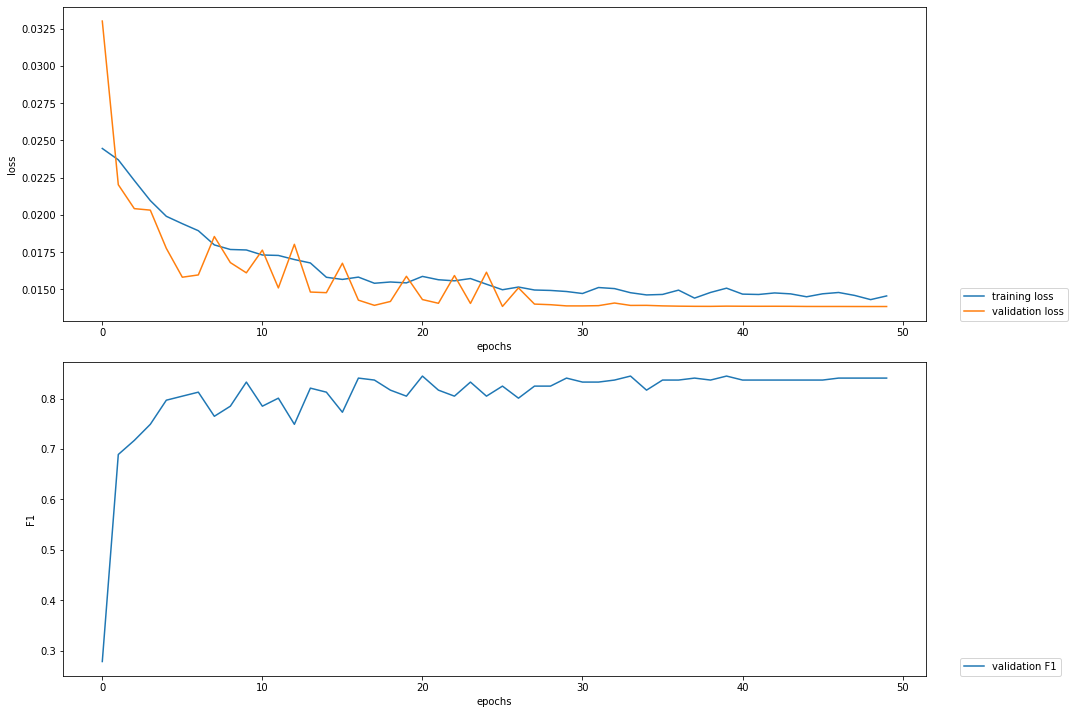

In [15]:
plotter = Plotter()
plotter.plot_training_curves('../resources/flair-polarity-en/loss.tsv')